# Air Quality Analysis and Prediction in Tamil Nadu

**Problem Definition:** The project aims to analyze and visualize air quality data from monitoring stations in Tamil Nadu. The objective is to gain insights into air pollution trends, identify areas with high pollution levels, and develop a predictive model to estimate RSPM/PM10 levels based on SO2 and NO2 levels. This project involves defining objectives, designing the analysis approach, selecting visualization techniques, and creating a predictive model using Python and relevant libraries.



## Project Objectives:
- Analyze the air quality in Tamil Nadu.
- Examine the changes in air quality over time.
- Extract insights from the data.
- Predict future trends in air quality and RSPM/PM10 levels based on SO2 & NO2 Levels.

## Analysis Approach:
 1) Clean and preprocess the data.
    1) Drop unwanted columns such as stn Code, State, etc...
    2) Change the Sampling Date data type to datetime object.
    3) Rename the Column names (Removing spaces & capital letters)
    4) Group the data by Area
 2) Conduct EDA on the data.
    1) Perform Various Visulizations of the Data
    2) Extract insights from the data.
 3) Build a predictive model.
    1) Compute Correlations and perform feature engineering.
    2) Pick Machine Learning Models based on the extracted insights and train and test them with the data.
 4) Present the results, insights, and findings.

## Visualization Selection
 - Overall Data Distributions of SO2, NO2 & RSPM/PM10 (Using Violin Chart)
 - Statistics of SO2, NO2, and RSPM/PM10 levels across different monitoring stations, cities, or areas
 - Histogram to Visualize the frequency distribution of pollutant levels
 - Data Distribution of Every Area and location type by Month (Using Violin Chart)
 - Data Distribution of Every Area and location type by Weekdays (Using Violin Chart)
 - Line chart of SO2, NO2, & PM10 in Every Area and Location Type, With Important Holidays Marked
 - Heat Map of Correlations between SO2, NO2 & PM10.
 - Regression Plots of SO2, NO2 & PM10 for every Area and Location Type.
 - Visualizing Spatial Air Quality Distribution in Tamil Nadu Using Heatmaps.

#### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from collections import defaultdict
import folium
import math 
import random
from folium.plugins import HeatMapWithTime
from matplotlib.dates import date2num
from matplotlib.lines import Line2D
from folium.map import Layer
from jinja2.environment import Template

# 1) Data Preprocess

In [2]:
data = pd.read_csv("tn-aq-2014.csv")
print(data.shape)
data.head()

(2879, 11)


Stn Code Sampling Date       State City/Town/Village/Area  \
0        38      01-02-14  Tamil Nadu                Chennai   
1        38      01-07-14  Tamil Nadu                Chennai   
2        38      21-01-14  Tamil Nadu                Chennai   
3        38      23-01-14  Tamil Nadu                Chennai   
4        38      28-01-14  Tamil Nadu                Chennai   

                     Location of Monitoring Station  \
0  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
1  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
2  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
3  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
4  Kathivakkam, Municipal Kalyana Mandapam, Chennai   

                                    Agency Type of Location   SO2   NO2  \
0  Tamilnadu State Pollution Control Board  Industrial Area  11.0  17.0   
1  Tamilnadu State Pollution Control Board  Industrial Area  13.0  17.0   
2  Tamilnadu State Pollution Control Board  Industrial Area  12.0  18.0   
3  Tamilnadu State Pollution Control Board  Industrial Area  15.0  16.0   
4  Tamilnadu State Pollution Control Board  Industrial Area  13.0  14.0   

   RSPM/PM10  PM 2.5  
0       55.0     NaN  
1       45.0     NaN  
2       50.0     NaN  
3       46.0     NaN  
4       42.0     NaN

Station Coordinates retrieved using BARD + Google Maps extension.

Code to get the Prompt:
```python
geo_cord_prompt = f"""
Locations:
{str(stn_df["name"].to_list())}


For all the listed locations, get the coordinates (latitude,longitude).
Output the results in a python list of tuples format [(lat,lon),...], follow the same order as the given list of locations.
"""

print(geo_coord_prompt)
```

In [3]:
# Stn Code, Location Name, Coordinates Mapping
stn_df = data[["Stn Code", "Location of Monitoring Station"]].drop_duplicates().reset_index(drop=True)
stn_df.columns = ["code","name"]
stn_df["coord"] = [
  (13.0682, 80.1492),
  (13.1362, 80.2417),
  (13.1562, 80.2267),
  (13.05, 80.23),
  (13.0582, 80.225),
  (13, 80.25),
  (13.0667, 80.25),
  (13.0833, 80.25),
  (13.1625, 80.2267),
  (13.0667, 80.2333),
  (10.9833, 76.95),
  (10.9833, 76.9667),
  (10.9833, 76.9667),
  (11, 76.9333),
  (11.7, 79.75),
  (11.7167, 79.7333),
  (9.95, 78.1),
  (9.95, 78.0833),
  (9.95, 78.1167),
  (12.2167, 78.1833),
  (12.2, 78.1667),
  (11.6667, 78.1667),
  (8.7833, 78.1333),
  (8.7833, 78.1333),
  (8.7833, 78.1333),
  (10.8167, 78.6667),
  (10.8167, 78.6667),
  (10.8, 78.6667),
  (10.8, 78.6833),
  (10.8167, 78.6667)
    ]


In [4]:
stn_df

code                                               name  \
0     38   Kathivakkam, Municipal Kalyana Mandapam, Chennai   
1     71                Govt. High School, Manali, Chennai.   
2     72                            Thiruvottiyur,  Chennai   
3    766                         Thiyagaraya Nagar, Chennai   
4    765                                Anna Nagar, Chennai   
5    764                                     Adyar, Chennai   
6    767                                   Kilpauk, Chennai   
7    159                    Madras Medical College, Chennai   
8    161            Thiruvottiyur Municipal Office, Chennai   
9    160                         NEERI, CSIR Campus Chennai   
10   375      Poniarajapuram, On the top of DEL, Coimbatore   
11   237                           SIDCO Office, Coimbatore   
12   238              Distt. Collector's Office, Coimbatore   
13   759                                Eachangadu Villagae   
14   761  District Environmental Engineer Office, Imperi...   
15   760               SIPCOT Industrial Complex, Cuddalore   
16   306             Highway (Project -I) Building, Madurai   
17   307  Fenner (I) Ltd. Employees Assiciation Building...   
18   308  Kunnathur Chatram East Avani Mollai Street, Ma...   
19   762                                Raman Nagar, Mettur   
20   763                   SIDCO Industrial Complex, Mettur   
21   309                 Sowdeswari College Building, Salem   
22   239                       Fisheries College, Tuticorin   
23   366                  AVM Jewellery Building, Tuticorin   
24   240                           Raja Agencies, Tuticorin   
25   769                              Gandhi Market, Trichy   
26   770                            Main Guard Gate, Tirchy   
27   771                       Bishop Heber College, Tirchy   
28   772                                Golden Rock, Trichy   
29   773                          Central Bus Stand, Trichy   

                 coord  
0   (13.0682, 80.1492)  
1   (13.1362, 80.2417)  
2   (13.1562, 80.2267)  
3       (13.05, 80.23)  
4    (13.0582, 80.225)  
5          (13, 80.25)  
6     (13.0667, 80.25)  
7     (13.0833, 80.25)  
8   (13.1625, 80.2267)  
9   (13.0667, 80.2333)  
10    (10.9833, 76.95)  
11  (10.9833, 76.9667)  
12  (10.9833, 76.9667)  
13       (11, 76.9333)  
14       (11.7, 79.75)  
15  (11.7167, 79.7333)  
16        (9.95, 78.1)  
17     (9.95, 78.0833)  
18     (9.95, 78.1167)  
19  (12.2167, 78.1833)  
20     (12.2, 78.1667)  
21  (11.6667, 78.1667)  
22   (8.7833, 78.1333)  
23   (8.7833, 78.1333)  
24   (8.7833, 78.1333)  
25  (10.8167, 78.6667)  
26  (10.8167, 78.6667)  
27     (10.8, 78.6667)  
28     (10.8, 78.6833)  
29  (10.8167, 78.6667)

In [5]:
data.isna().sum(axis=0)

Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                 11
NO2                                 13
RSPM/PM10                            4
PM 2.5                            2879
dtype: int64

In [6]:
data = data.drop(columns=["Stn Code", "State","Agency","PM 2.5"])
data = data.dropna() # Dropping nans
data["Sampling Date"] = pd.to_datetime(data["Sampling Date"])
data.columns = ["date","area","loc","loctype","SO2","NO2","RSPM/PM10"]

In [7]:
unique_areas = data["area"].unique()
unique_loctyp  = data["loctype"].unique()
print("Areas:",unique_areas)
print("Type of locations:", unique_loctyp)

Areas: ['Chennai' 'Coimbatore' 'Cuddalore' 'Madurai' 'Mettur' 'Salem'
 'Thoothukudi' 'Trichy']
Type of locations: ['Industrial Area' 'Residential, Rural and other Areas']


In [8]:
data_by_area = {area_name: area_data.drop("area",axis=1).sort_values("date") for area_name, area_data in data.groupby("area")}

# 2) Exploratory Data Analysis
**$\text{SO}_2$ (Sulfur Dioxide)**:
- Colorless gas with a pungent odor.
- It is produced by burning fossil fuels containing sulfur, such as coal and oil.
- It can lead to respiratory problems and contribute to the formation of acid rain.

**$\text{NO}_2$ (Nitrogen Dioxide)**:
- Reddish-brown gas that forms when nitrogen oxides (NOx) react with the atmosphere.
- It is primarily released from combustion processes in vehicles and industrial activities.
- It contribute to respiratory issues and the formation of ground-level ozone, which is harmful to health.

**RSPM/PM10 (Respirable Suspended Particulate Matter/Particulate Matter with a diameter of 10 micrometers or less)**:
- Tiny solid or liquid particles suspended in the air with a diameter of 10 micrometers or less.
- These particles can come from various sources, including dust, vehicle emissions, construction activities, and industrial processes.
- RSPM/PM10 can be inhaled into the lungs, leading to respiratory problems and other health issues.

UNIT OF MEASUREMENT: $\mu g/m^3$ (**micrograms per cubic meter**)




In [9]:
# Color Scheme
so2_color = "#EBCB8B"
no2_color = "#BF616A"
pm10_color = "#4C566A"

## Statistics of SO2, NO2, and RSPM/PM10 levels across different monitoring stations, cities, or areas

In [10]:
unique_stn = stn_df["name"].to_list()
computed_statistics = {}
for area_, data_ in data_by_area.items():
    computed_info = {
        "statistics": data_.describe(),
        "stat_by_loctype" : {},
        "stations": {
            
        }
    }
    for area_type in unique_loctyp:
        sub_group = data_[data_["loctype"] == area_type]
        if len(sub_group) > 0:
            computed_info["stat_by_loctype"][area_type] = sub_group.describe()
            
    for station,sub_group in data_.groupby('loc'):
        sub_group = data_[data_["loc"] == station]

        computed_info["stations"][station] = {"area_type": sub_group["loctype"].iloc[0], "statistics":sub_group.describe()}

    computed_statistics[area_] = computed_info

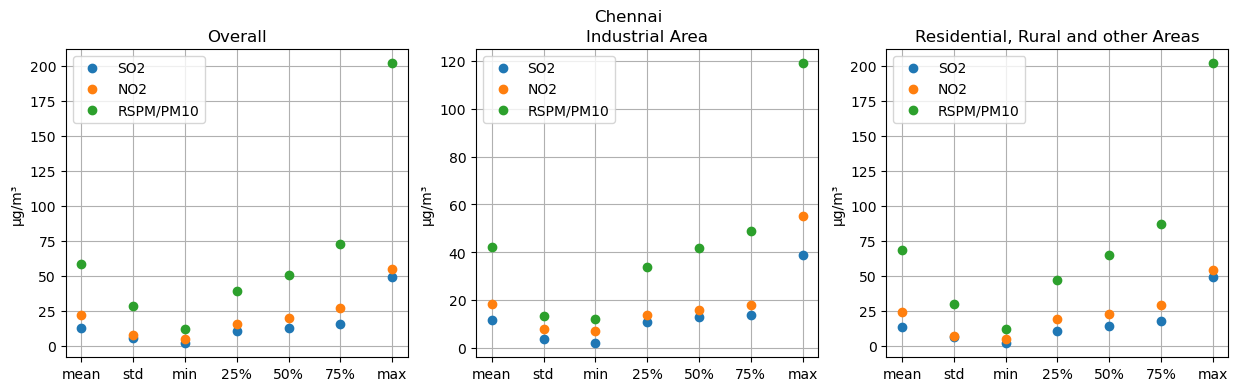

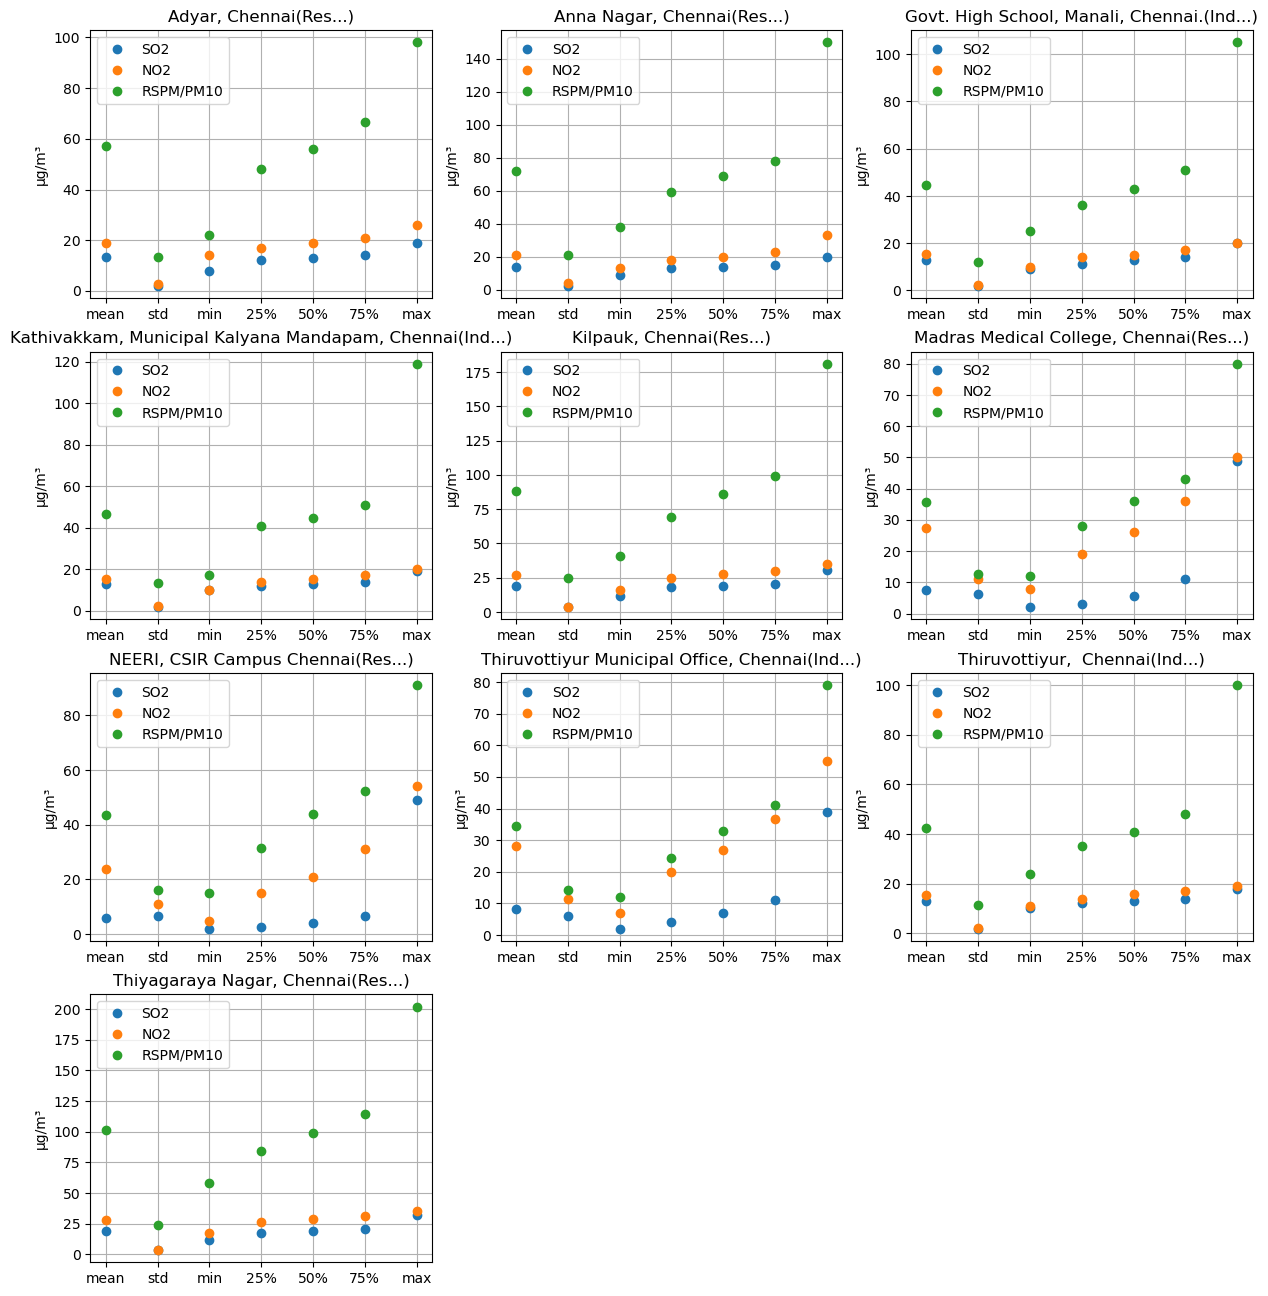

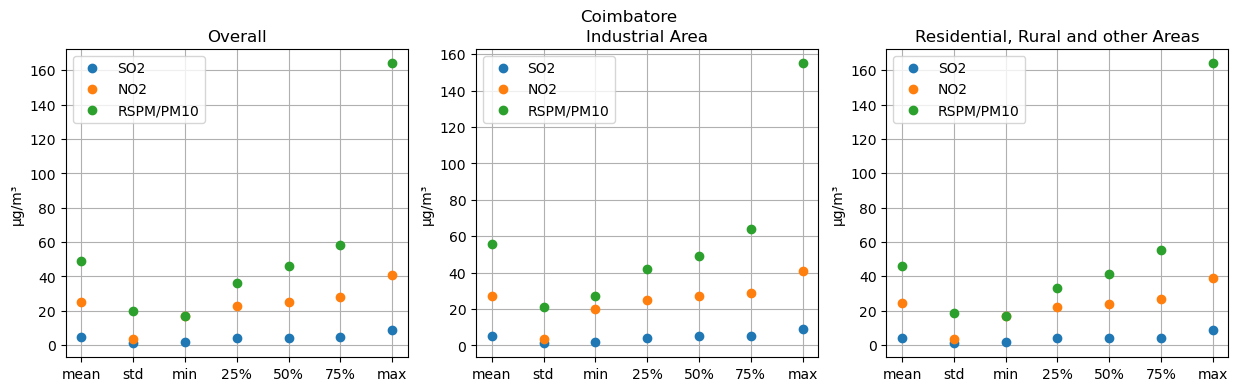

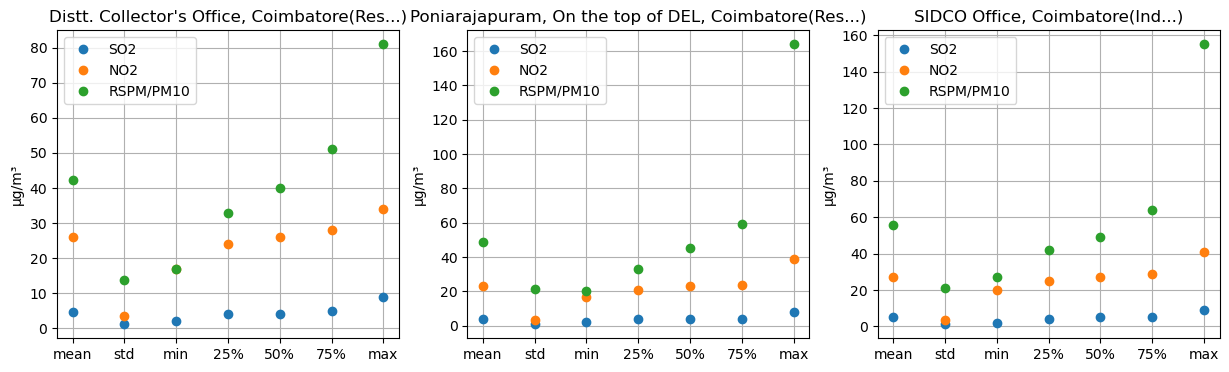

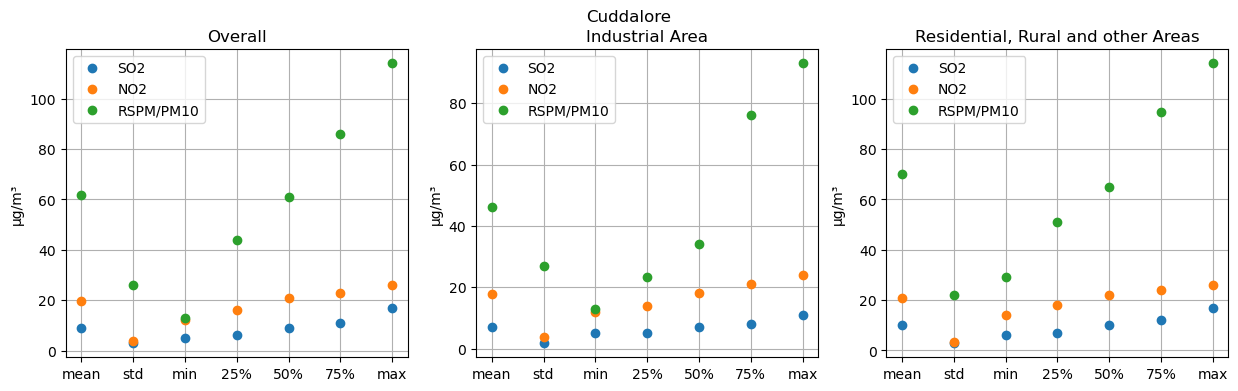

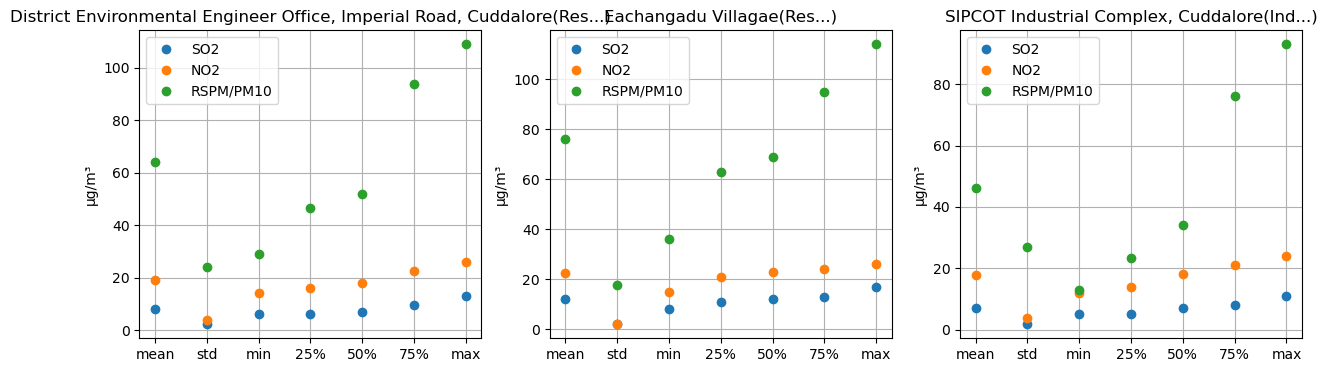

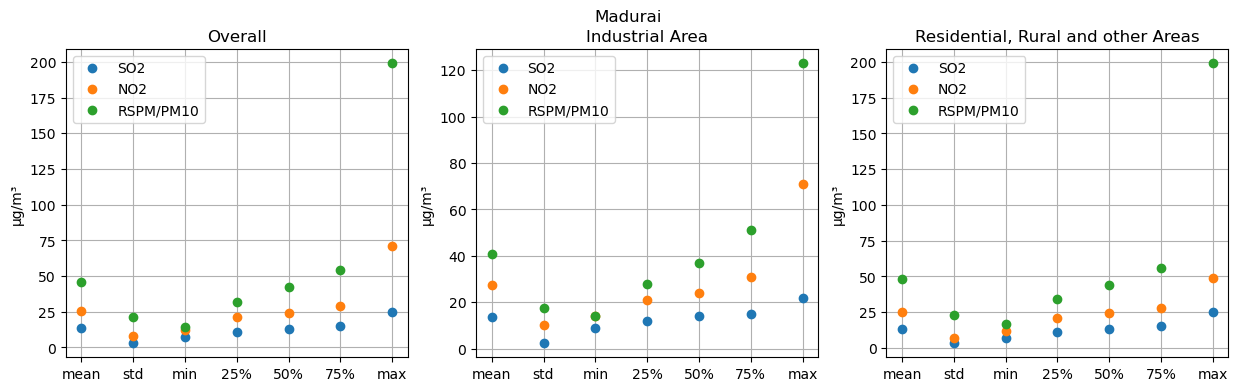

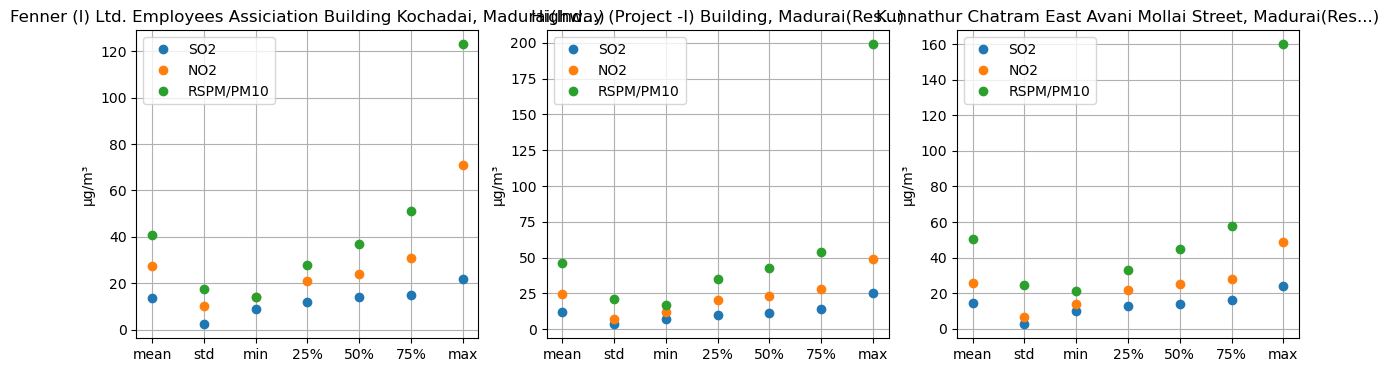

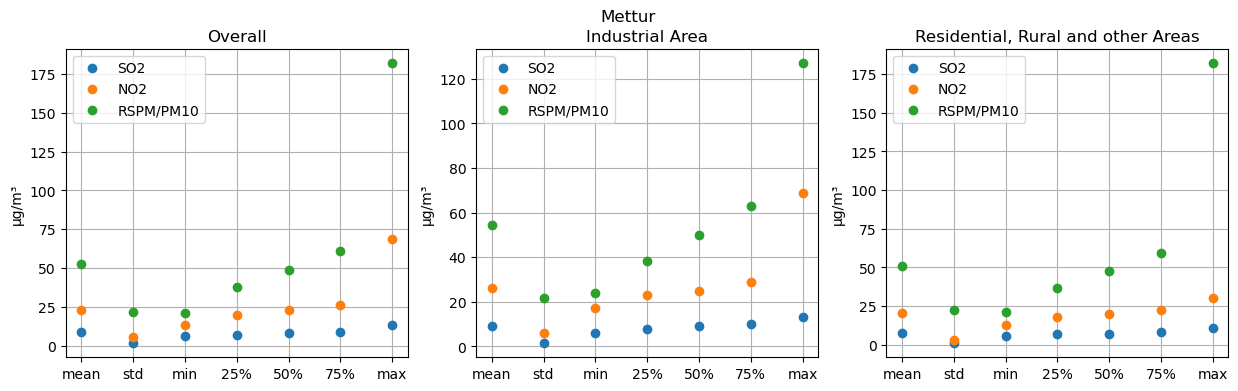

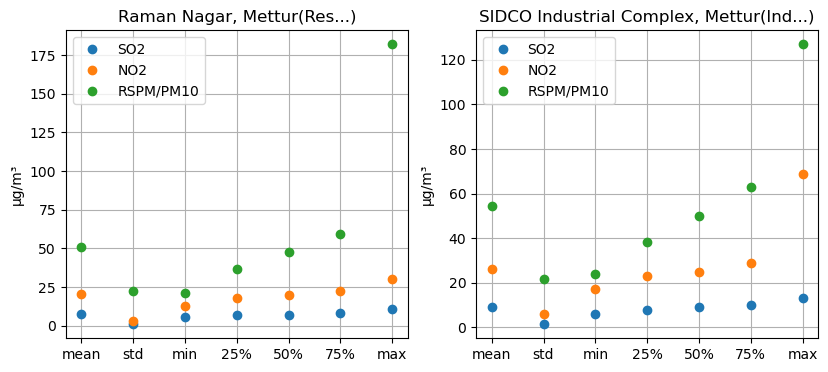

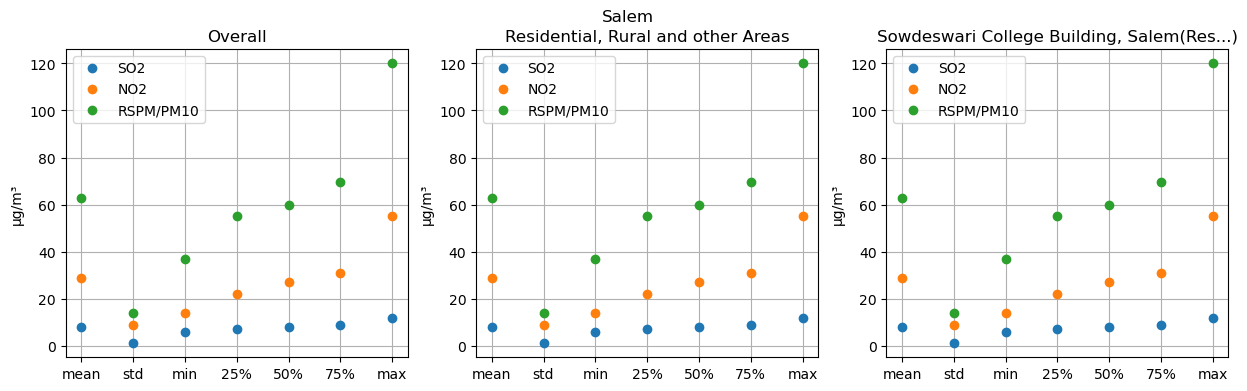

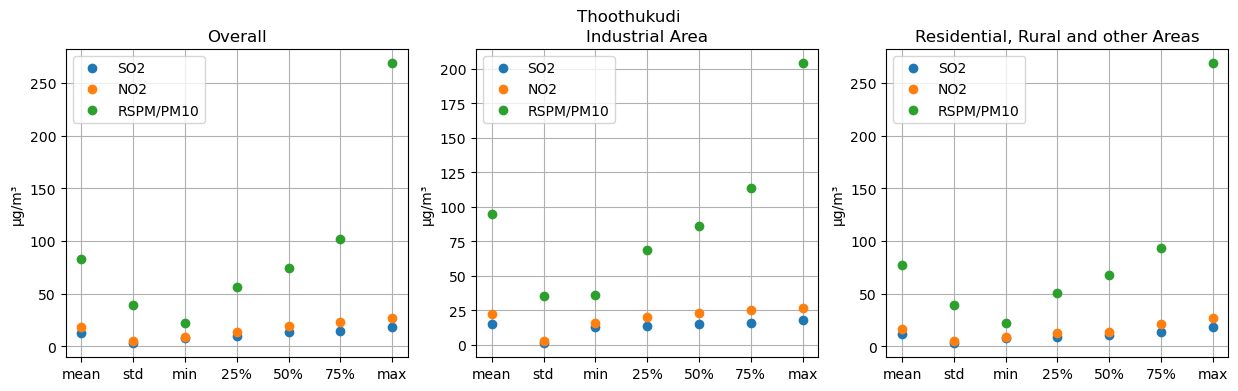

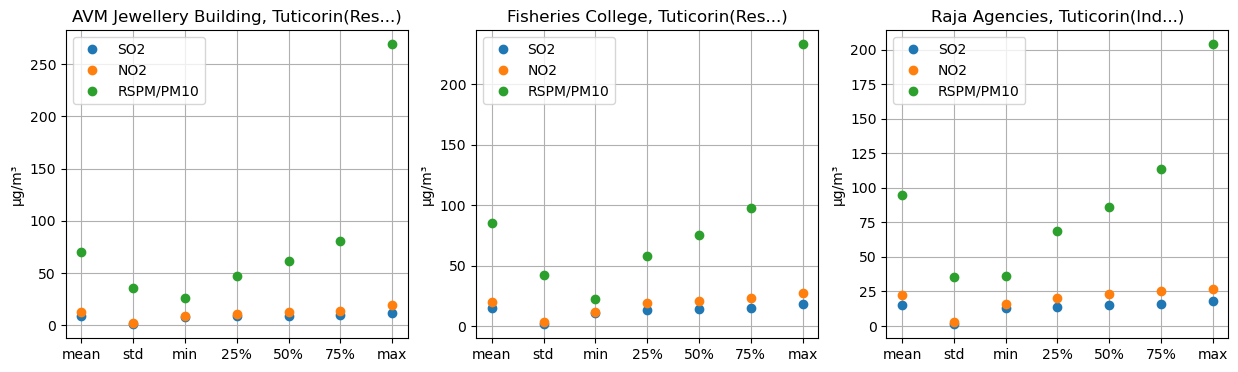

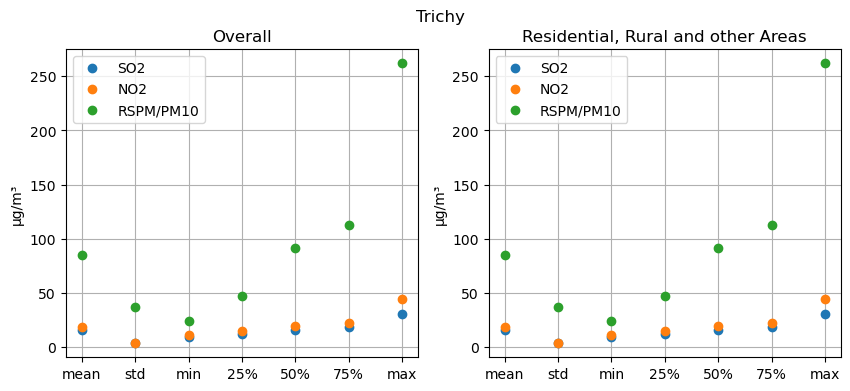

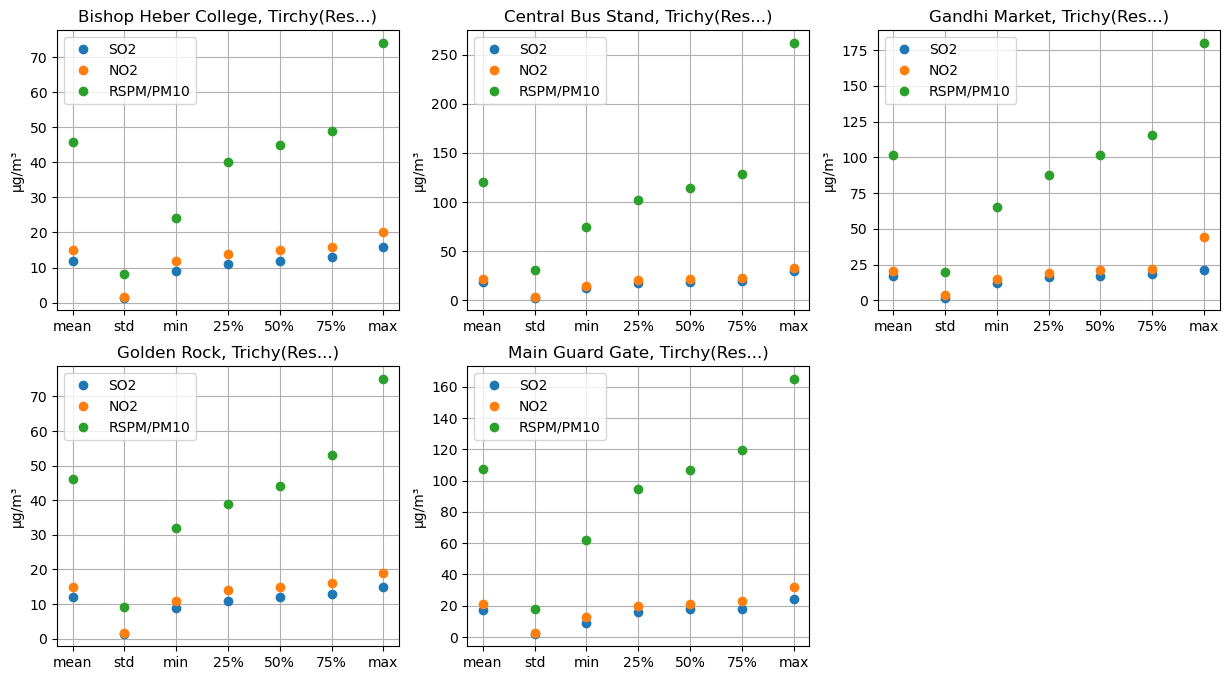

In [11]:
def draw_(stat,title,ax):
    stat.iloc[1:,:] .plot(kind="line",linestyle='',marker="o",ax=ax)
    ax.grid()
    ax.set_ylabel("µg/m³")
    ax.set_title(title)
def foo(area):
    info = computed_statistics[area]
    
    a_n = len(info["stat_by_loctype"])+1
    if area == "Salem":
        a_n +=1
        
    fig, axes = plt.subplots(nrows=1,ncols=a_n,figsize=(5*a_n,4))
    draw_(info["statistics"],"Overall",axes[0])
    i=1
    for area_type, stat in info["stat_by_loctype"].items():
        draw_(stat,area_type,axes[i])
        i+=1
    plt.suptitle(area)
    if area == "Salem": # Hard coded for salem because it will not fit to the skeleton
        station = 'Sowdeswari College Building, Salem'
        draw_(info["stations"][station]["statistics"], station + f"({info['stations'][station]['area_type'][:3]}...)", axes[i])
        plt.show()
        return
    plt.show()

    stations = info['stations'].keys()
    q, r = divmod(len(stations), 3)
    col_n =q + (1 if r > 0 else 0)
    fig, axes = plt.subplots(nrows=col_n, ncols=3, figsize=(5 * 3, 4 * col_n))
    
    for i, station in enumerate(stations):
        row, col = divmod(i, 3)
            
        ax = axes[row]
        if col_n >1:
            ax = axes[row][col]
        else:
            ax = axes[col]
        
        draw_(info["stations"][station]["statistics"], station + f"({info['stations'][station]['area_type'][:3]}...)", ax)
    
    if r > 0:
        for j in range(r, 3):
            if col_n>1:
                fig.delaxes(axes[q, j])
            else:
                fig.delaxes(axes[j])
    plt.show()
        
for area in unique_areas:
    foo(area)
        

## Overall Frequency & Data Distribution of SO2, NO2 & RSPM/PM10

In [12]:
desc = data.describe()
desc

SO2          NO2    RSPM/PM10
count  2862.000000  2862.000000  2862.000000
mean     11.506988    22.135220    62.437456
std       5.050855     7.133291    31.277419
min       2.000000     5.000000    12.000000
25%       8.000000    17.000000    41.000000
50%      12.000000    21.500000    55.000000
75%      15.000000    25.000000    78.000000
max      49.000000    71.000000   269.000000

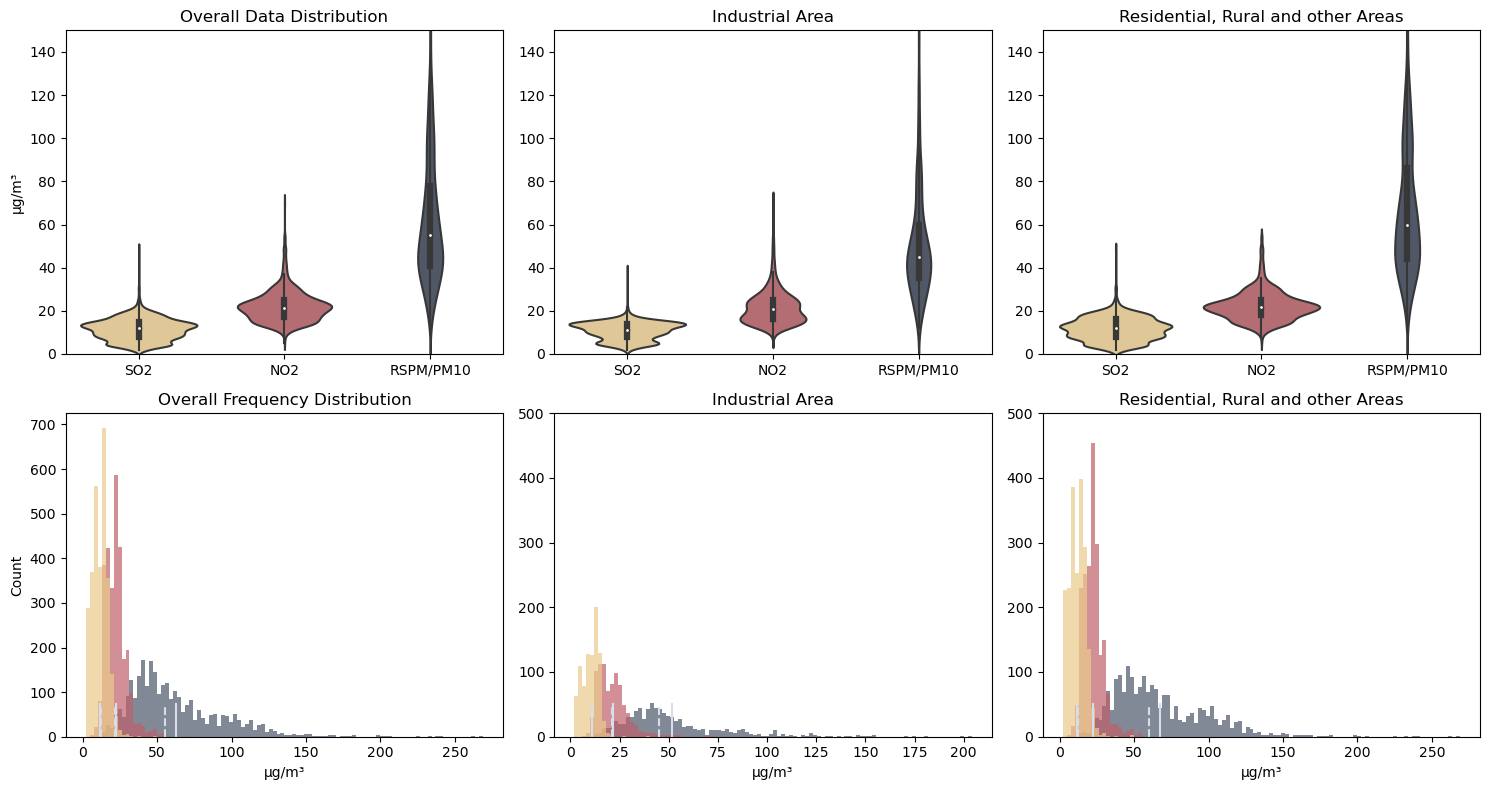

In [13]:

fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,8))
sns.violinplot(data,palette=[so2_color,no2_color,pm10_color],ax=axes[0][0])
axes[0][0].set_ylabel("µg/m³")
axes[0][0].set_title("Overall Data Distribution")
axes[0][0].set_ylim(0,150)
for i in range(2):
    ax = axes[0][i+1]
    sns.violinplot(data[data["loctype"]==unique_loctyp[i]],palette=[so2_color,no2_color,pm10_color],ax=ax)
    ax.set_title(unique_loctyp[i])
    ax.set_ylim(0,150)


sns.histplot(data,bins=100,palette=[so2_color,no2_color,pm10_color],alpha=0.7, linewidth=0,ax=axes[1][0],legend=False)

for i in range(3):
    axes[1][0].axvline(desc.loc["mean"][i], color="#D8DEE9", linestyle='-', label='Mean',ymax=0.1)
    axes[1][0].axvline(desc.loc["50%"][i], color="#D8DEE9", linestyle='--', label='50%',ymax=0.1)

axes[1][0].set_ylabel("Count")
axes[1][0].set_xlabel("µg/m³")
axes[1][0].set_title("Overall Frequency Distribution")
for i in range(2):
    data_ = data[data["loctype"]==unique_loctyp[i]]
    ax = axes[1][i+1]
    sns.histplot(data_,bins=100,palette=[so2_color,no2_color,pm10_color],alpha=0.7, linewidth=0,ax=ax,legend=False)
    mean_values = data_.mean(numeric_only=True)
    median_values = data_.median(numeric_only=True)
    for j in range(3):
        ax.axvline(mean_values[j], color="#D8DEE9", linestyle='-', label='Mean',ymax=0.1)
        ax.axvline(median_values[j], color="#D8DEE9", linestyle='--', label='50%',ymax=0.1)
    ax.set_ylabel("")
    ax.set_xlabel("µg/m³")
    ax.set_ylim(0,500)
    ax.set_title(unique_loctyp[i])
plt.tight_layout()
plt.show()

## Overall Data Distribution by Month

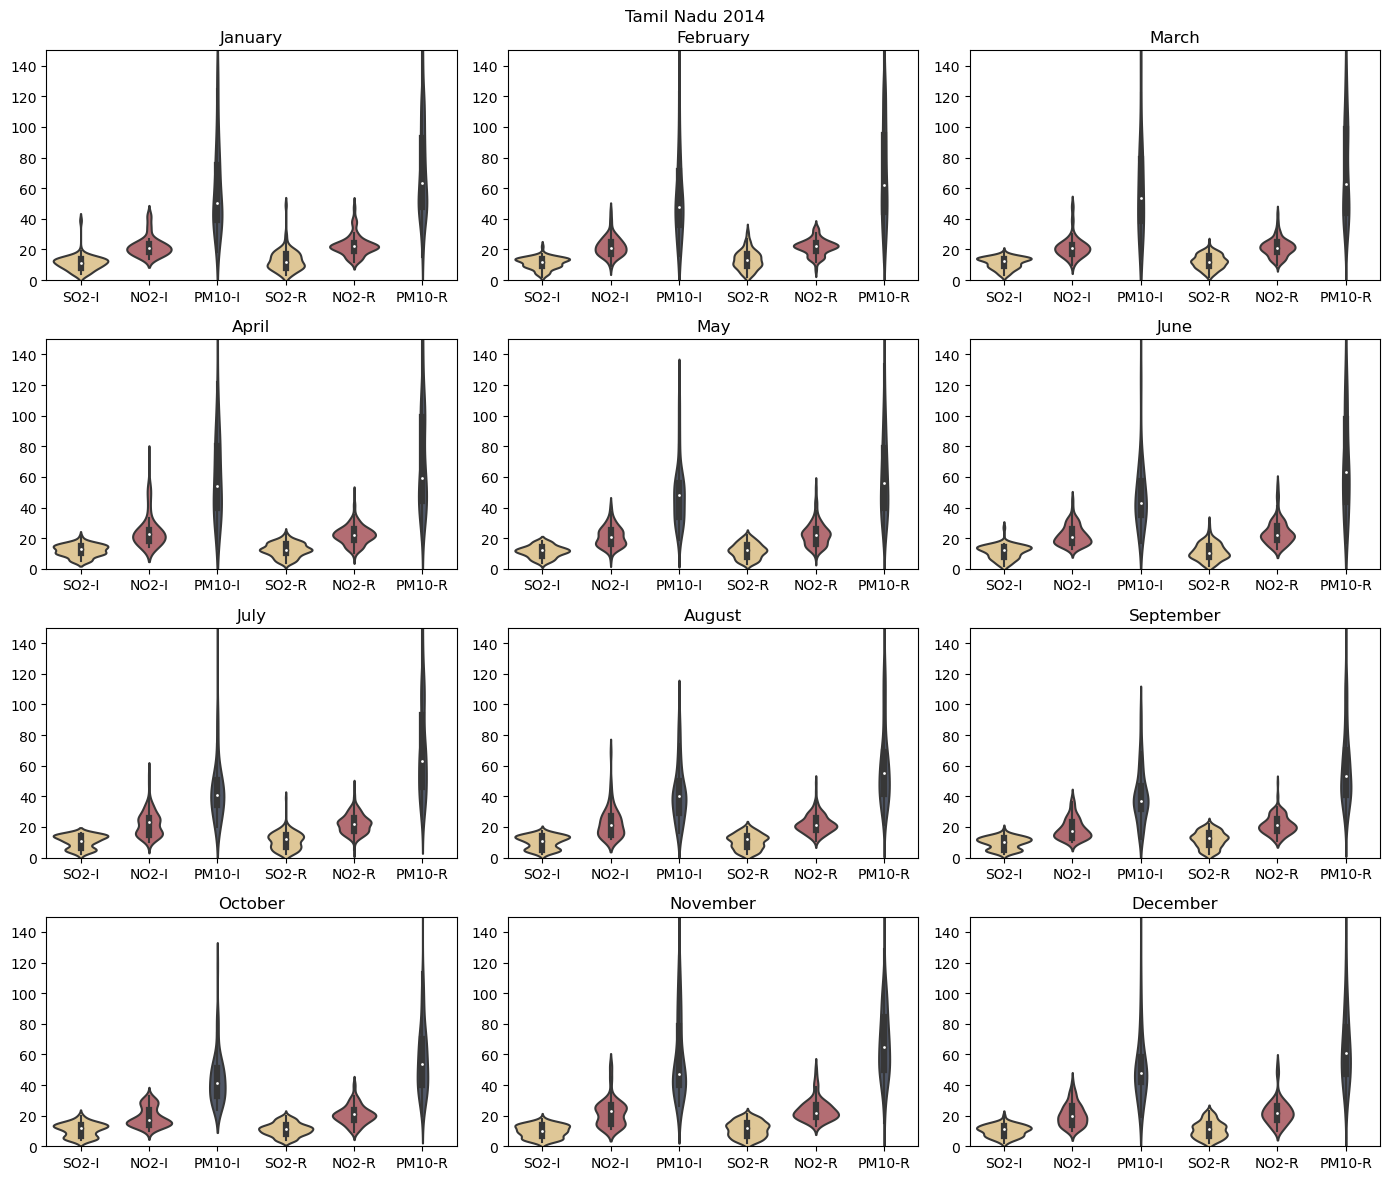

In [14]:
def make_temp_loctyp(data):
    tempdf = pd.DataFrame()
    for n, x in data.groupby("loctype"):
        tempdfn = pd.DataFrame()
        tempdfn["SO2-"+n[0]] = x["SO2"]
        tempdfn["NO2-"+n[0]] = x["NO2"]
        tempdfn["PM10-"+n[0]] = x["RSPM/PM10"]
        tempdf = pd.concat([tempdf, tempdfn], ignore_index=True)
    
    return tempdf
    
def draw_():
    fig,axes = plt.subplots(nrows=4,ncols=3,figsize=(14,12))
    for i,(group, data_) in enumerate(data.groupby(data["date"].dt.to_period('M'))):
        tempdf = make_temp_loctyp(data_)
        ax = axes[i//3][i%3]
        sns.violinplot(tempdf,ax=ax,palette=[so2_color,no2_color,pm10_color,so2_color,no2_color,pm10_color])
        ax.set_title(group.strftime("%B"))
        ax.set_ylim(0,150)
    plt.suptitle("Tamil Nadu 2014")
    plt.tight_layout()
    plt.show()
draw_()

## Data Distribution of Every Area and location type by Month

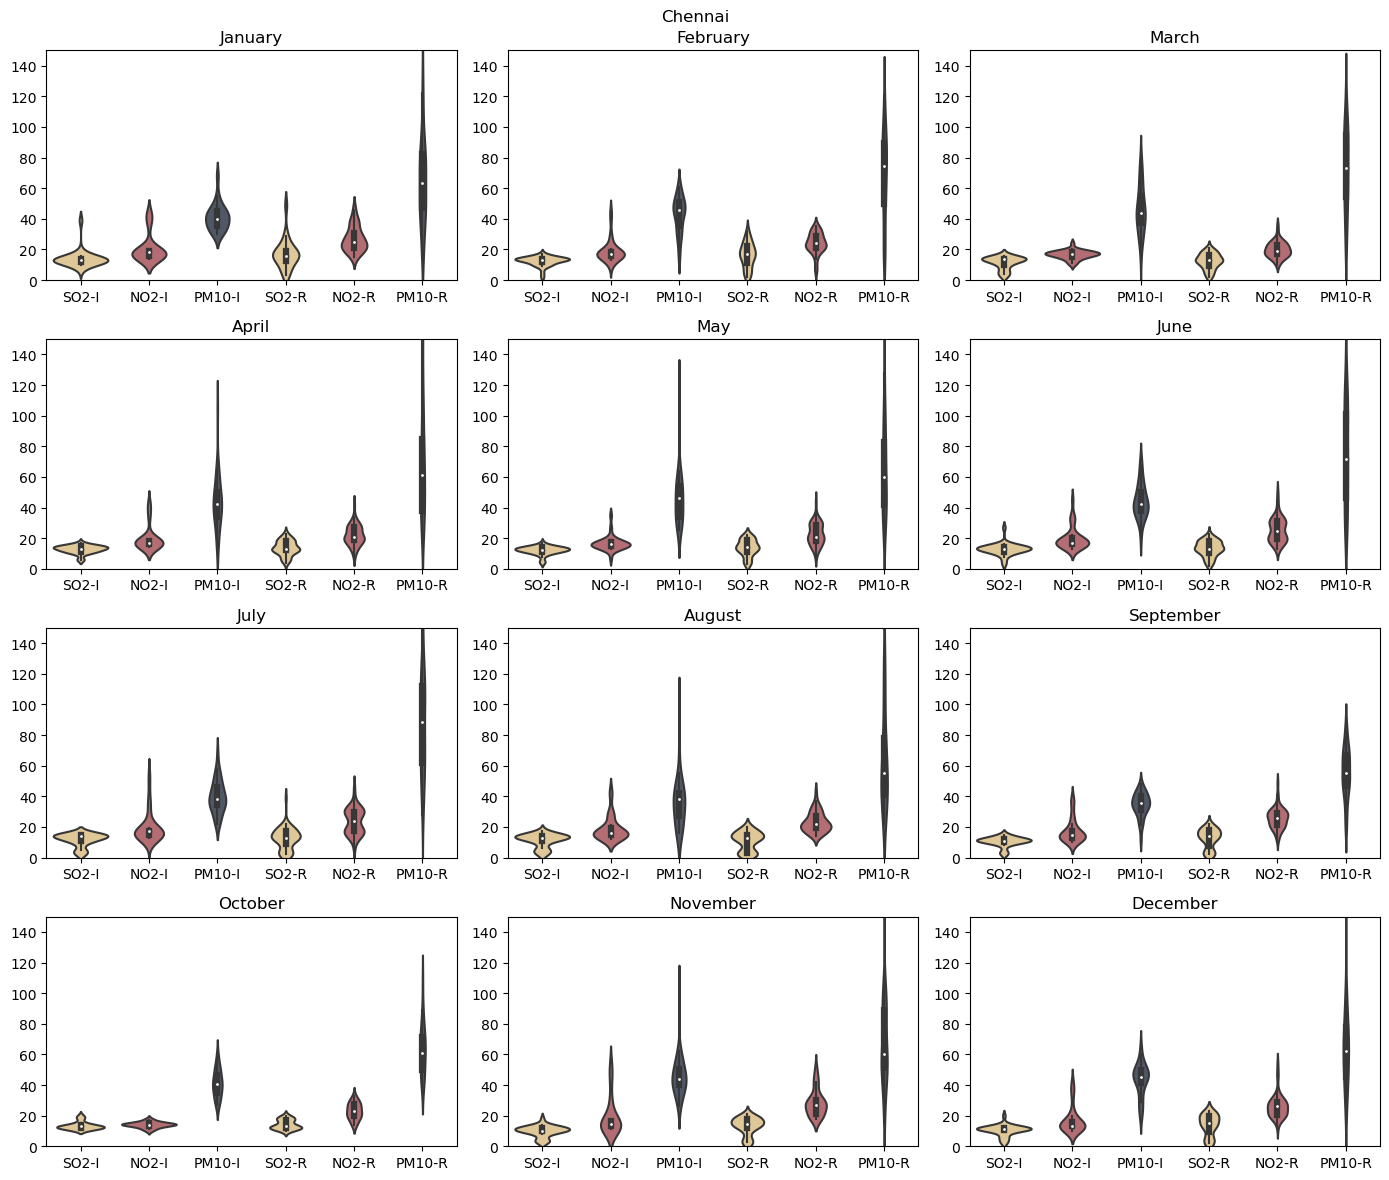

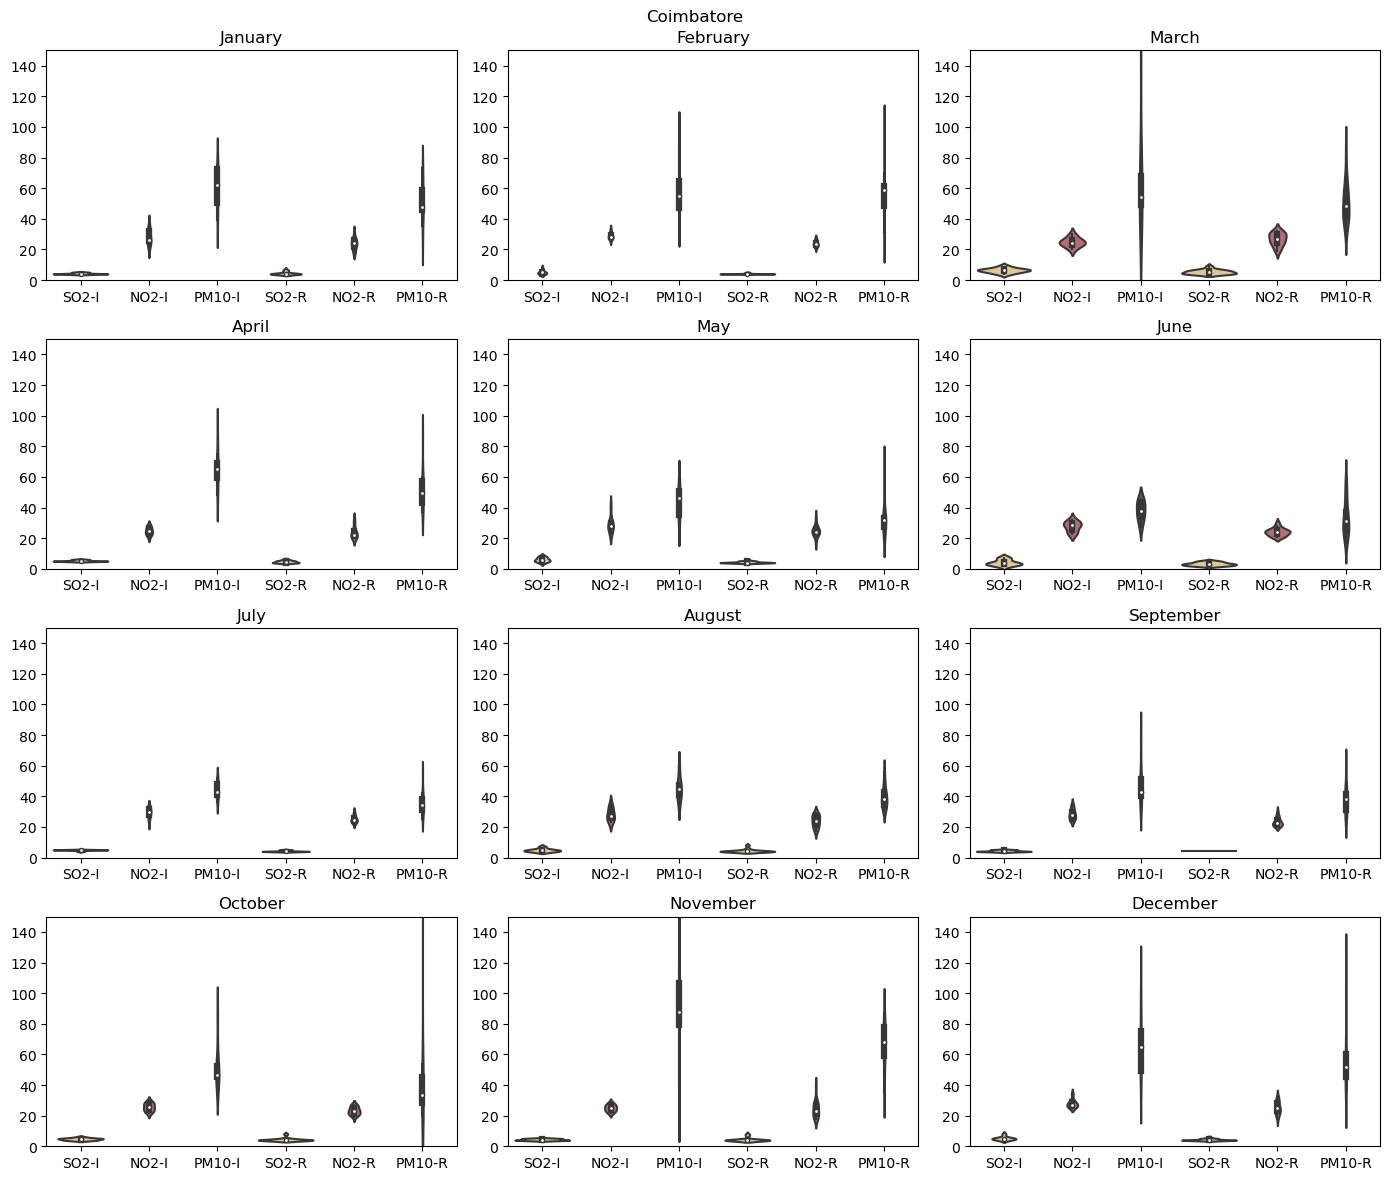

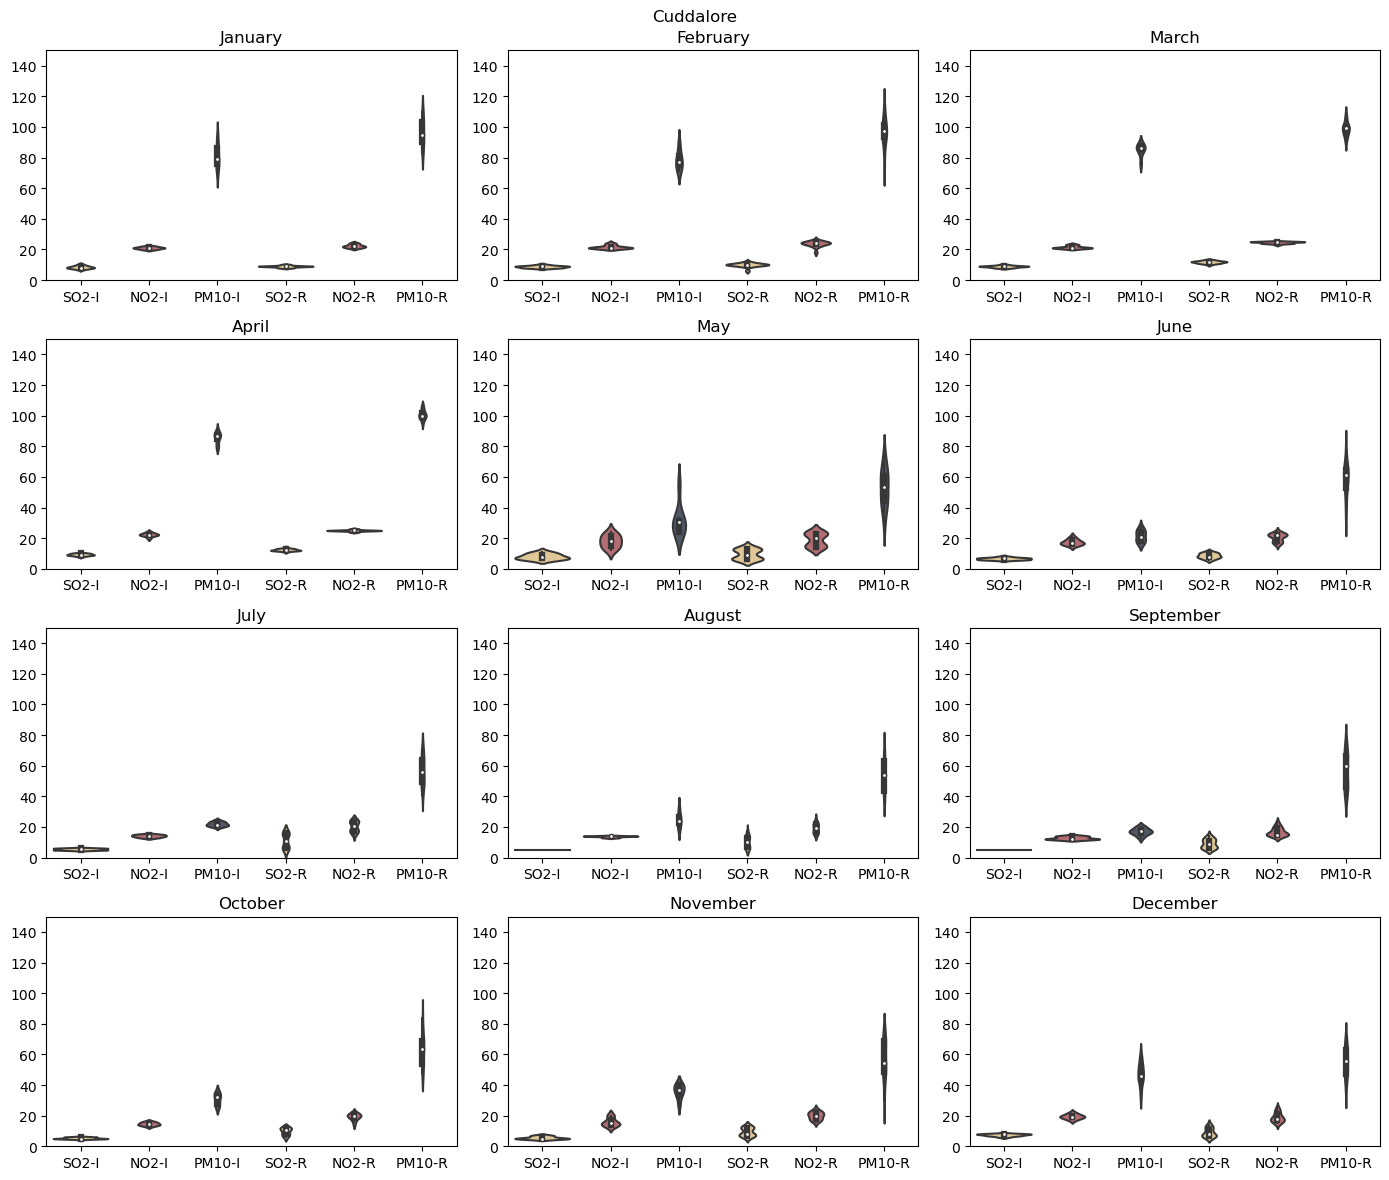

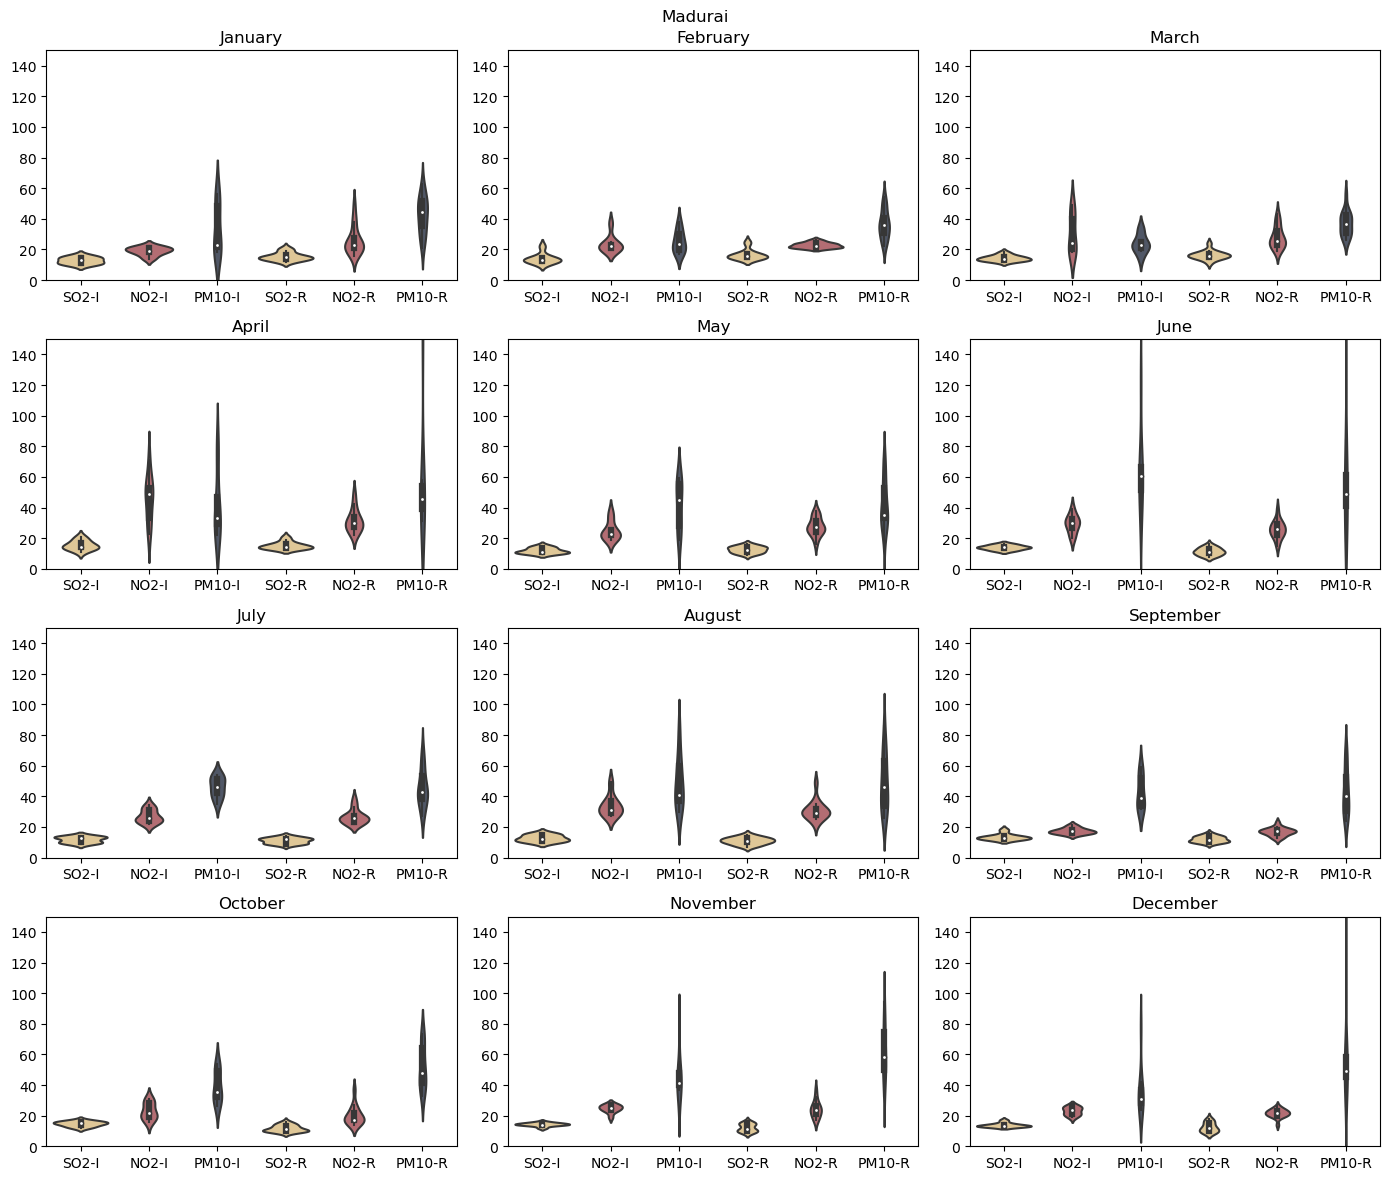

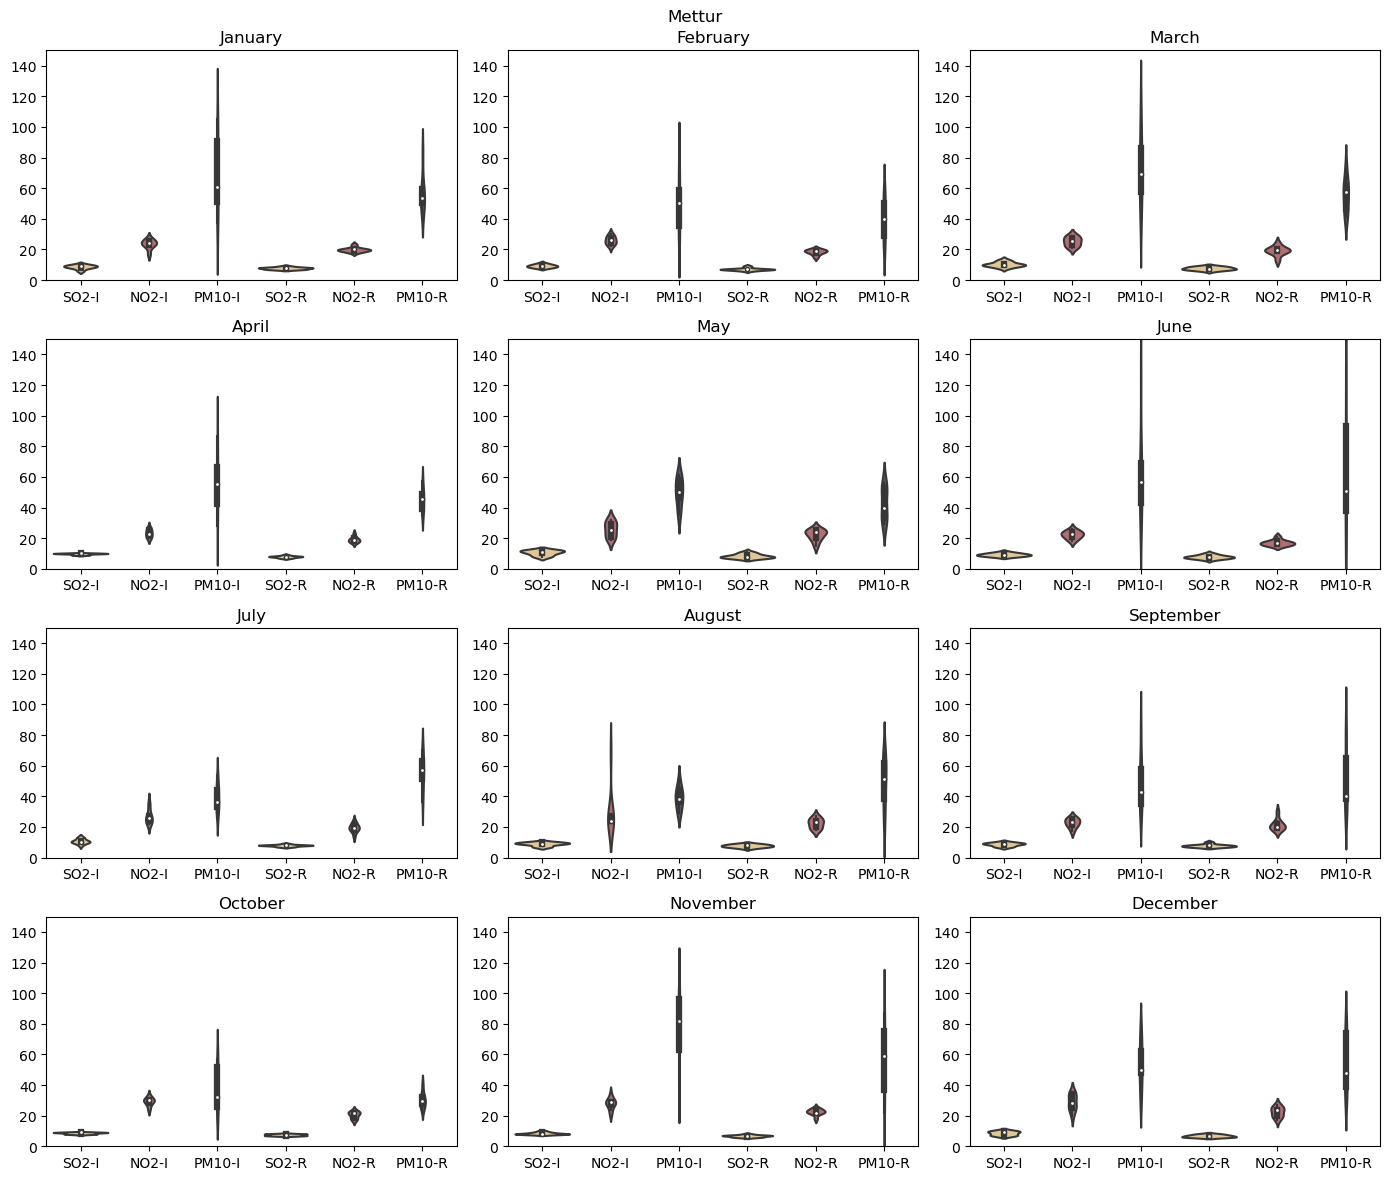

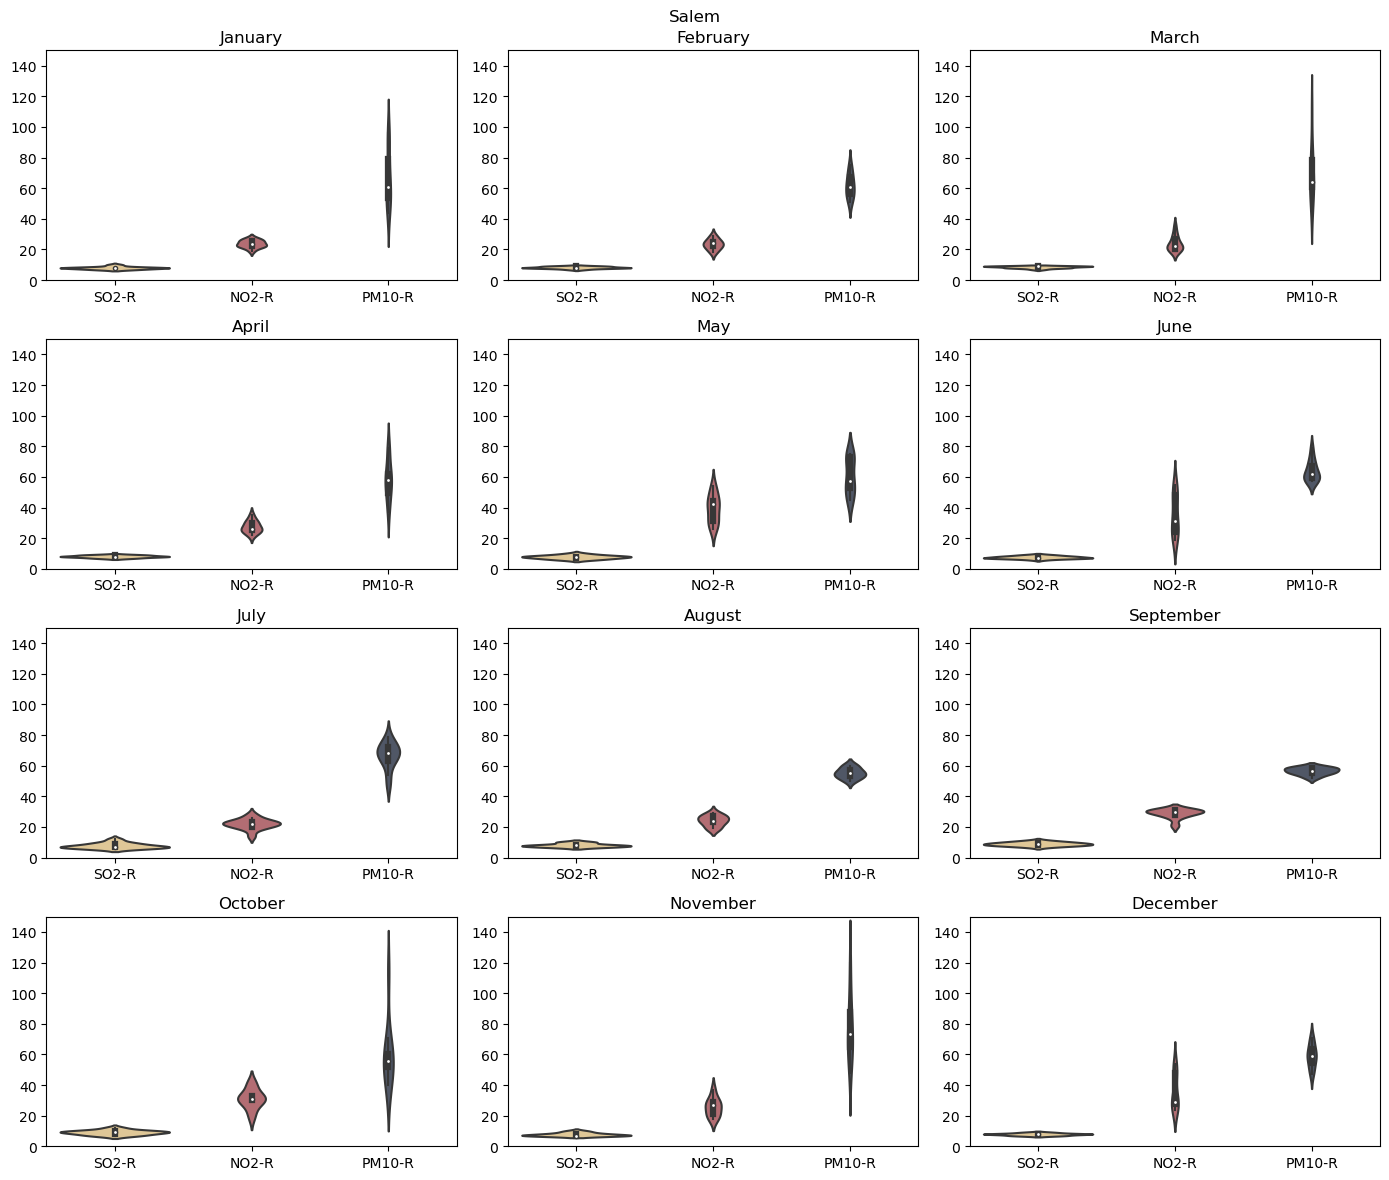

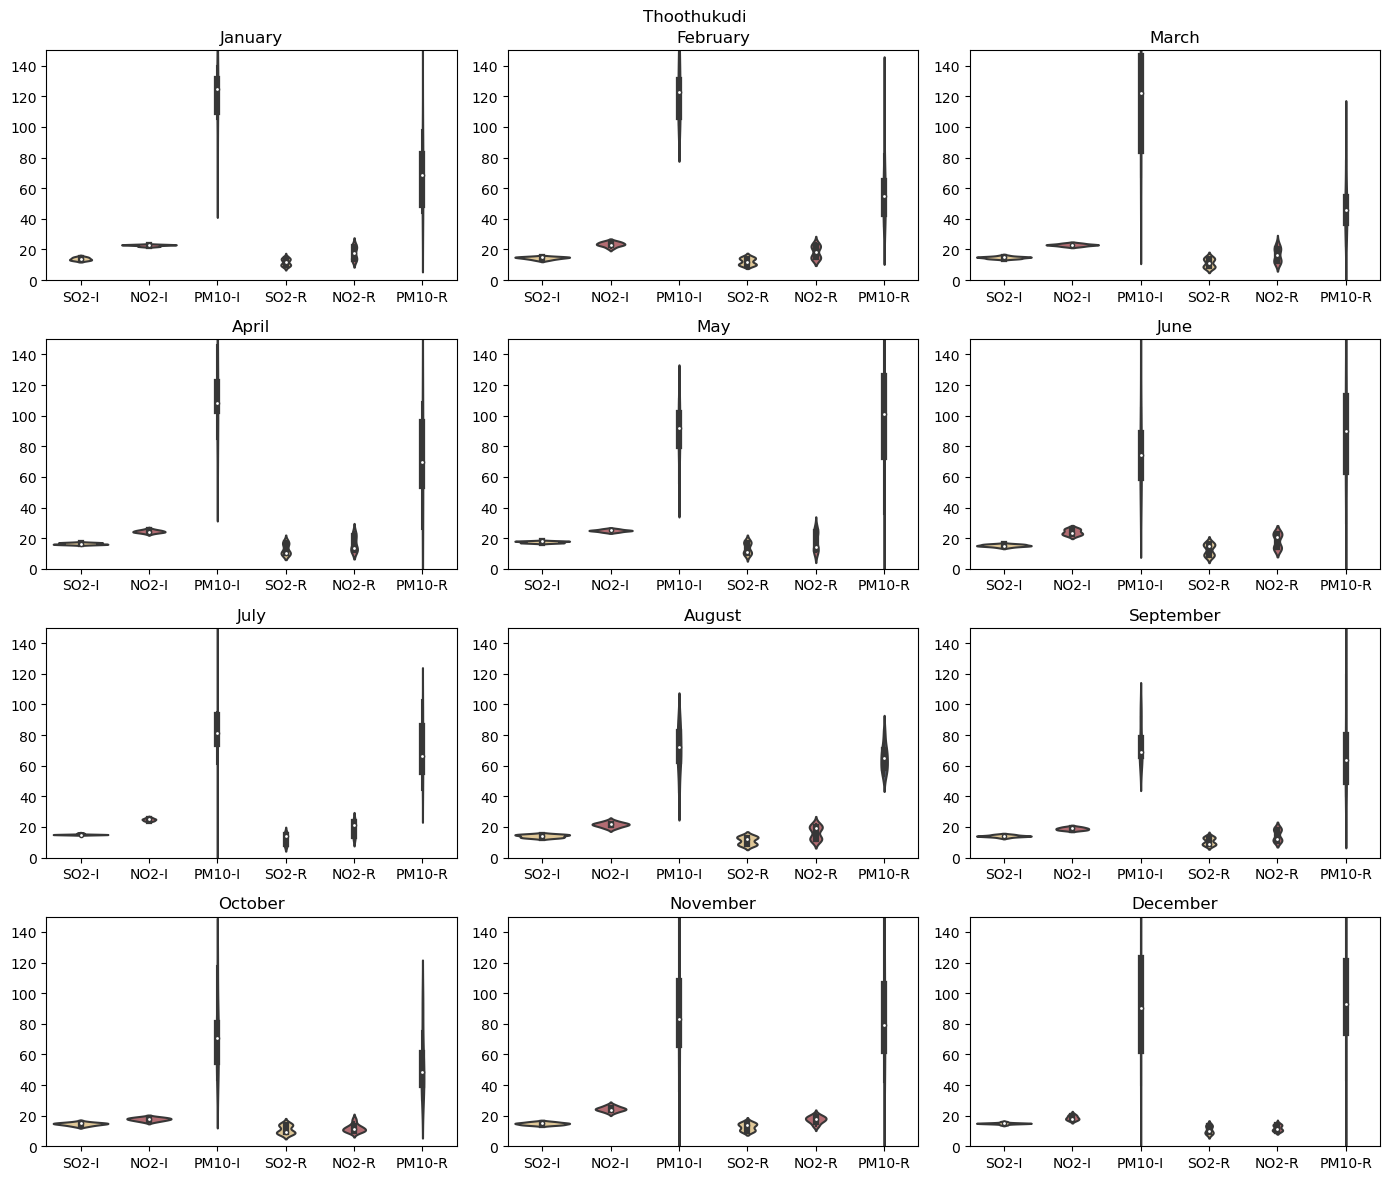

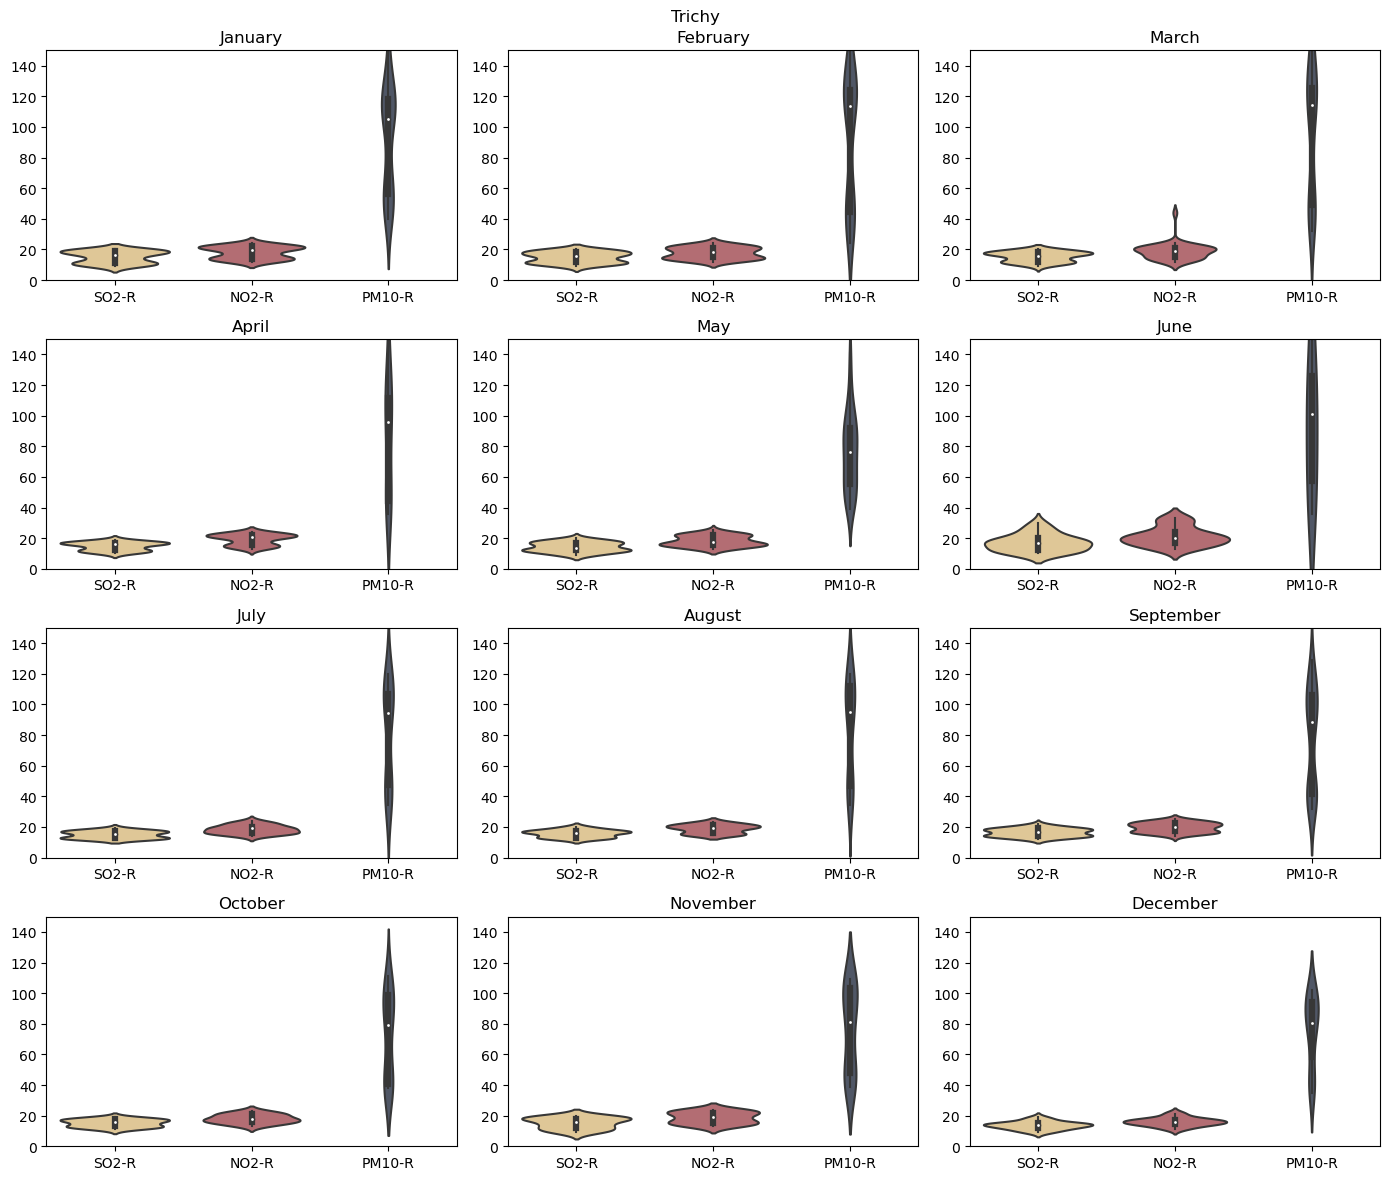

In [15]:
def draw_(area):
    fig,axes = plt.subplots(nrows=4,ncols=3,figsize=(14,12))
    for i,(group, data_) in enumerate(data_by_area[area].groupby(data_by_area[area]["date"].dt.to_period('M'))):

        tempdf = make_temp_loctyp(data_)
        ax = axes[i//3][i%3]
        sns.violinplot(tempdf,ax=ax,palette=[so2_color,no2_color,pm10_color,so2_color,no2_color,pm10_color])
        ax.set_title(group.strftime("%B"))
        ax.set_ylim(0,150)
    plt.suptitle(area)
    plt.tight_layout()
    plt.show()

for area in unique_areas:
    draw_(area)

## Data Distribution of Every Area and location type by Weekdays (MON to SAT)
**NOTE:** NO DATA AVAILABLE FOR SUNDAYS, SO I REMOVED SUNDAY FROM THE LIST

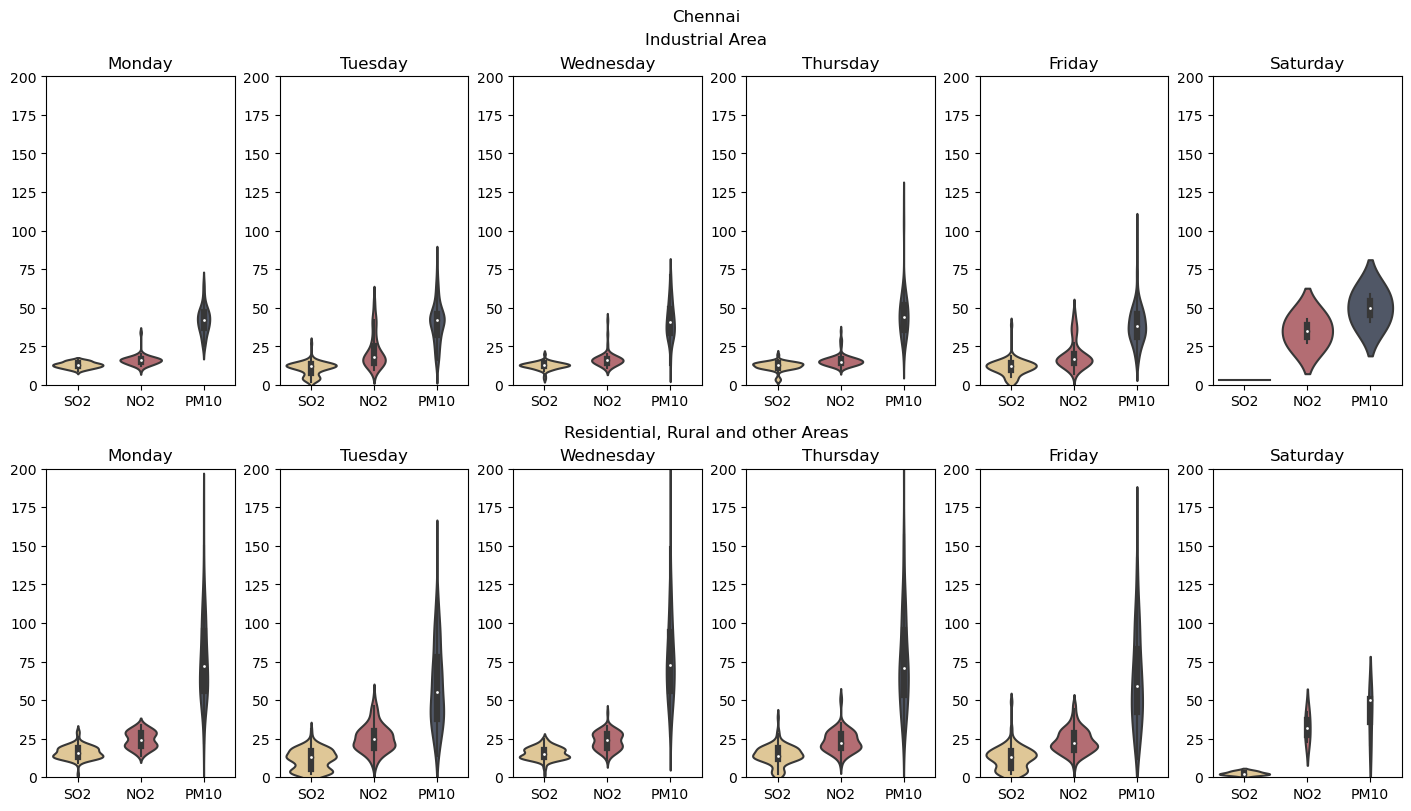

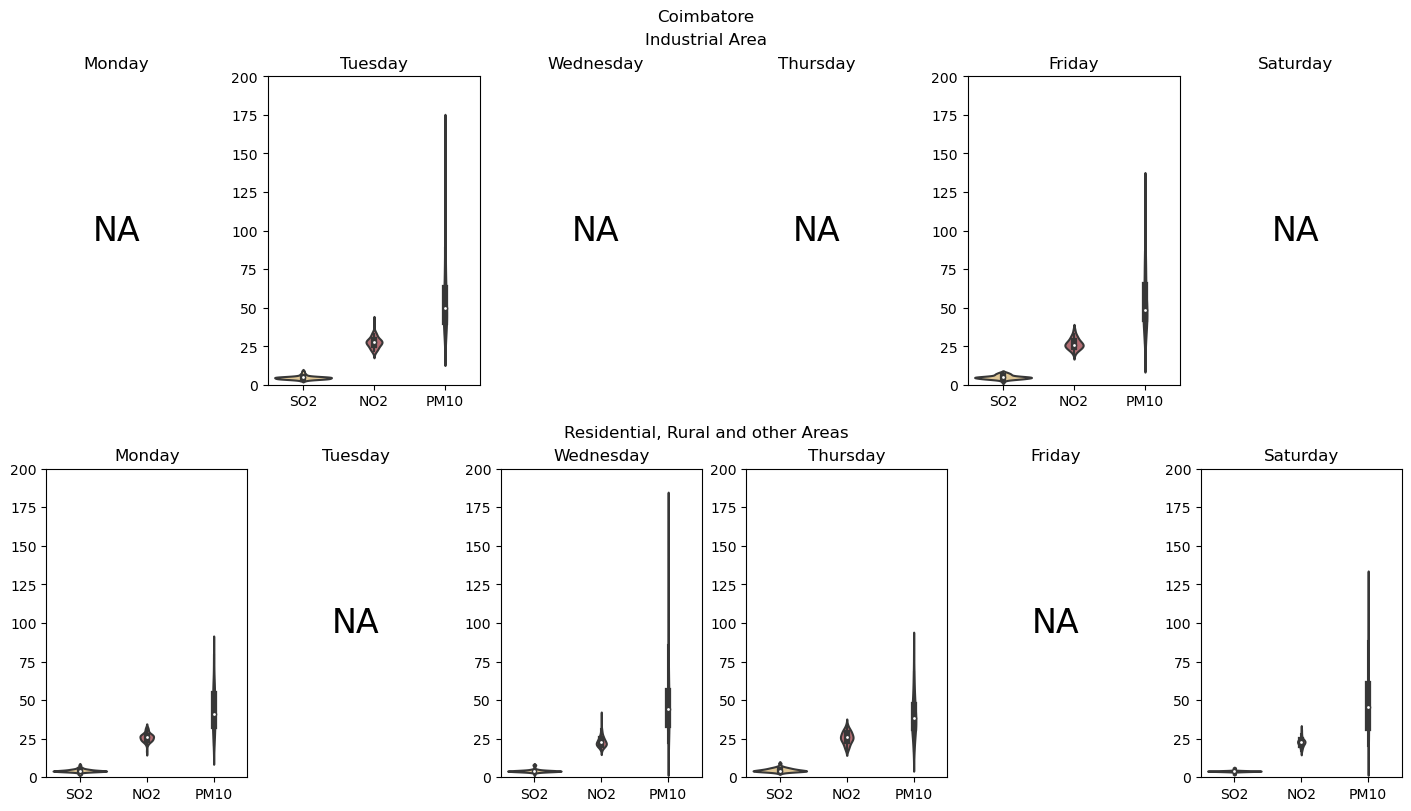

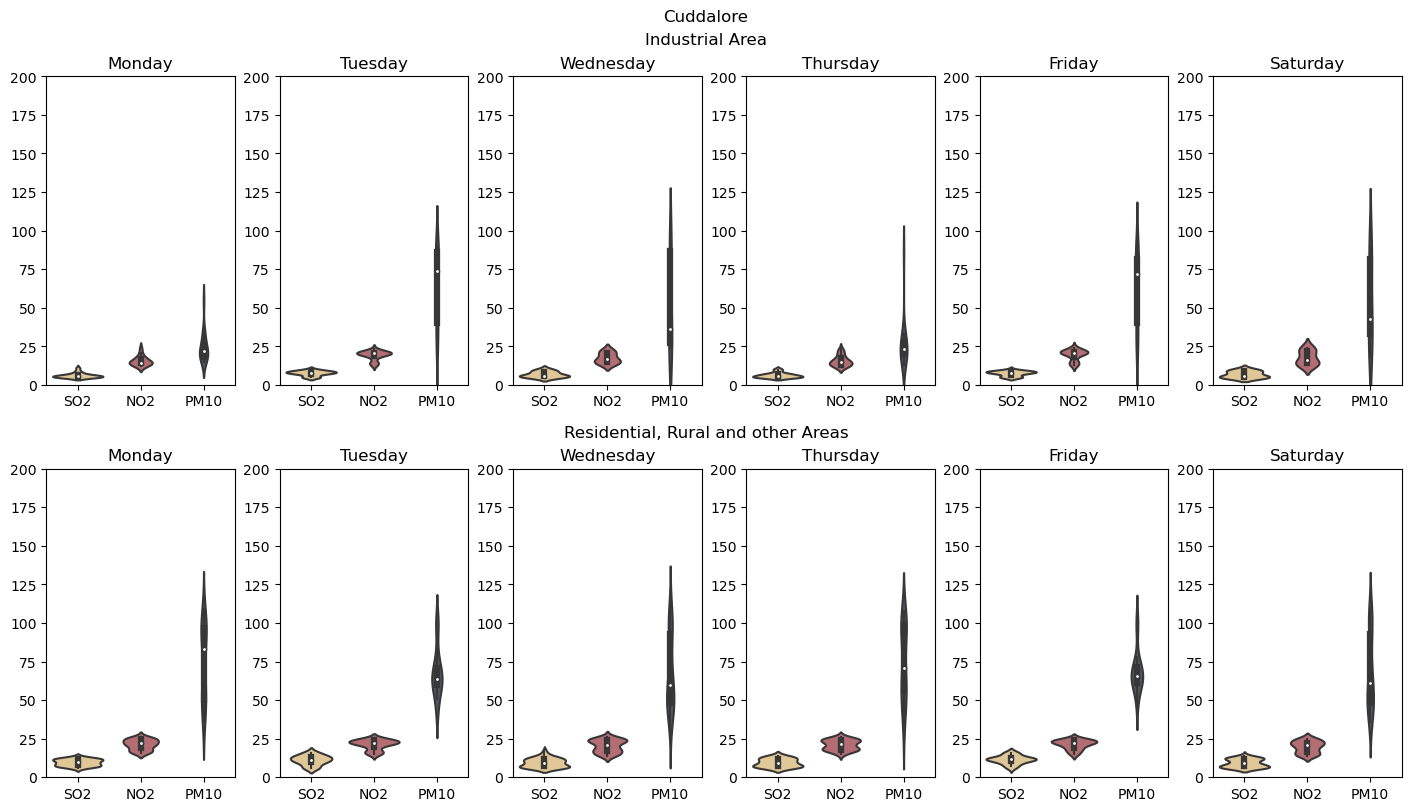

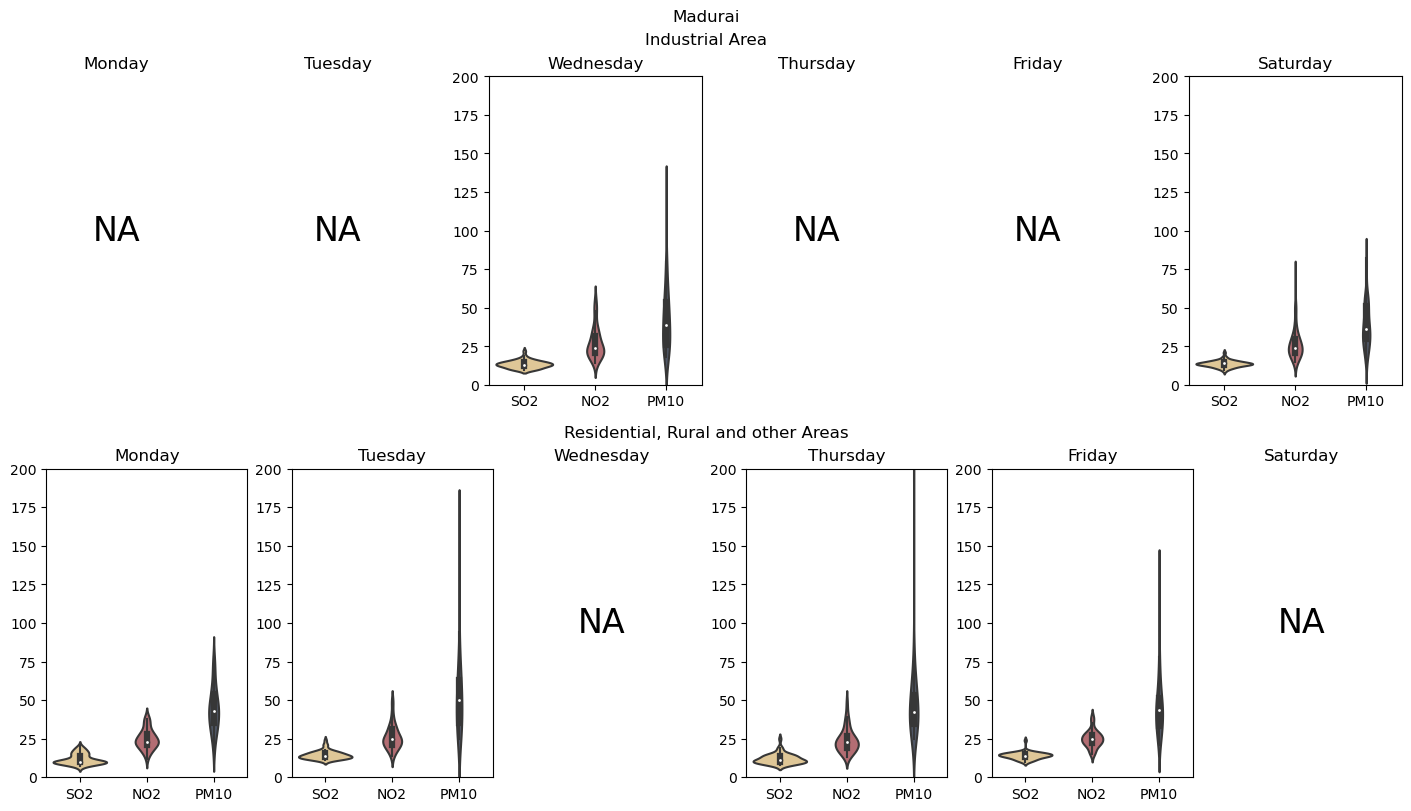

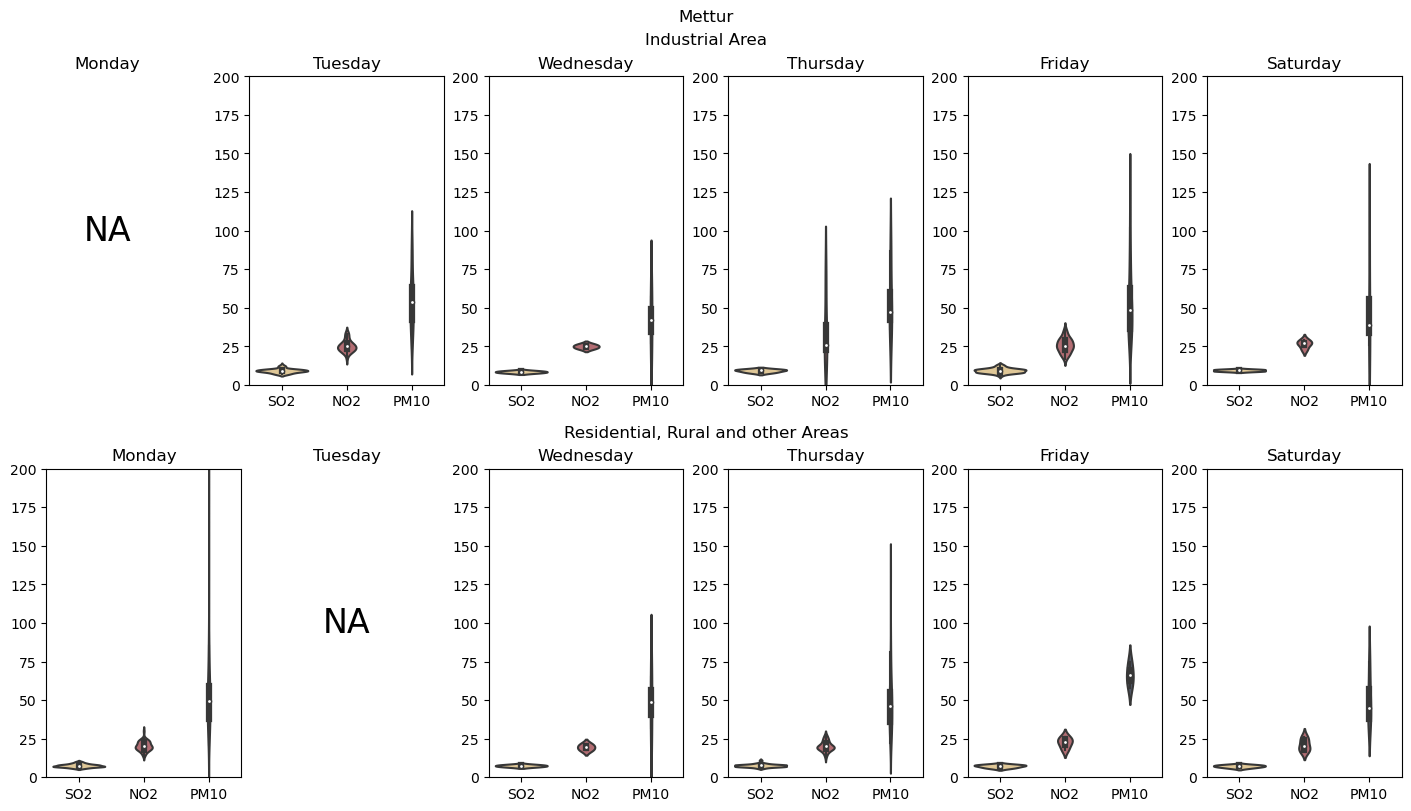

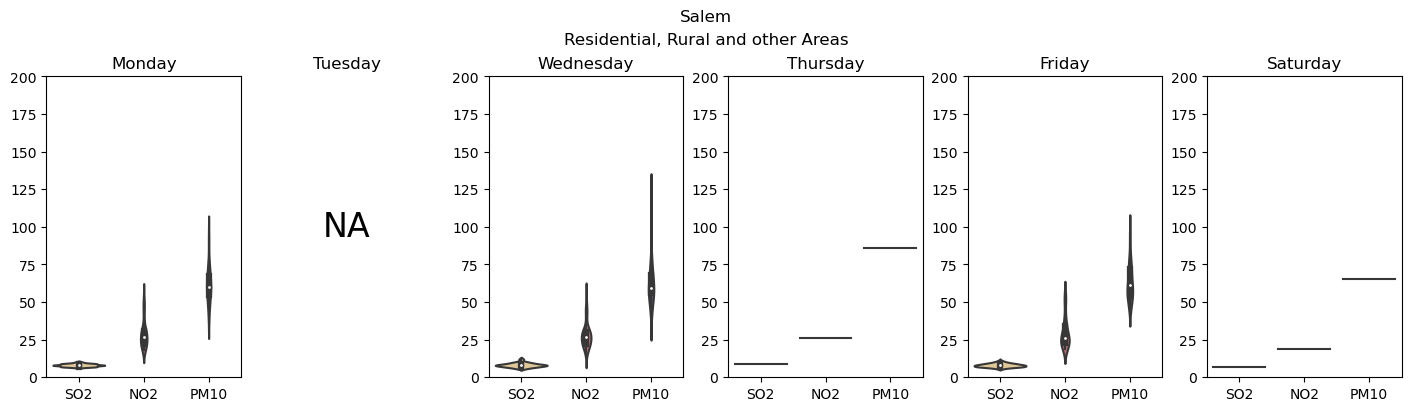

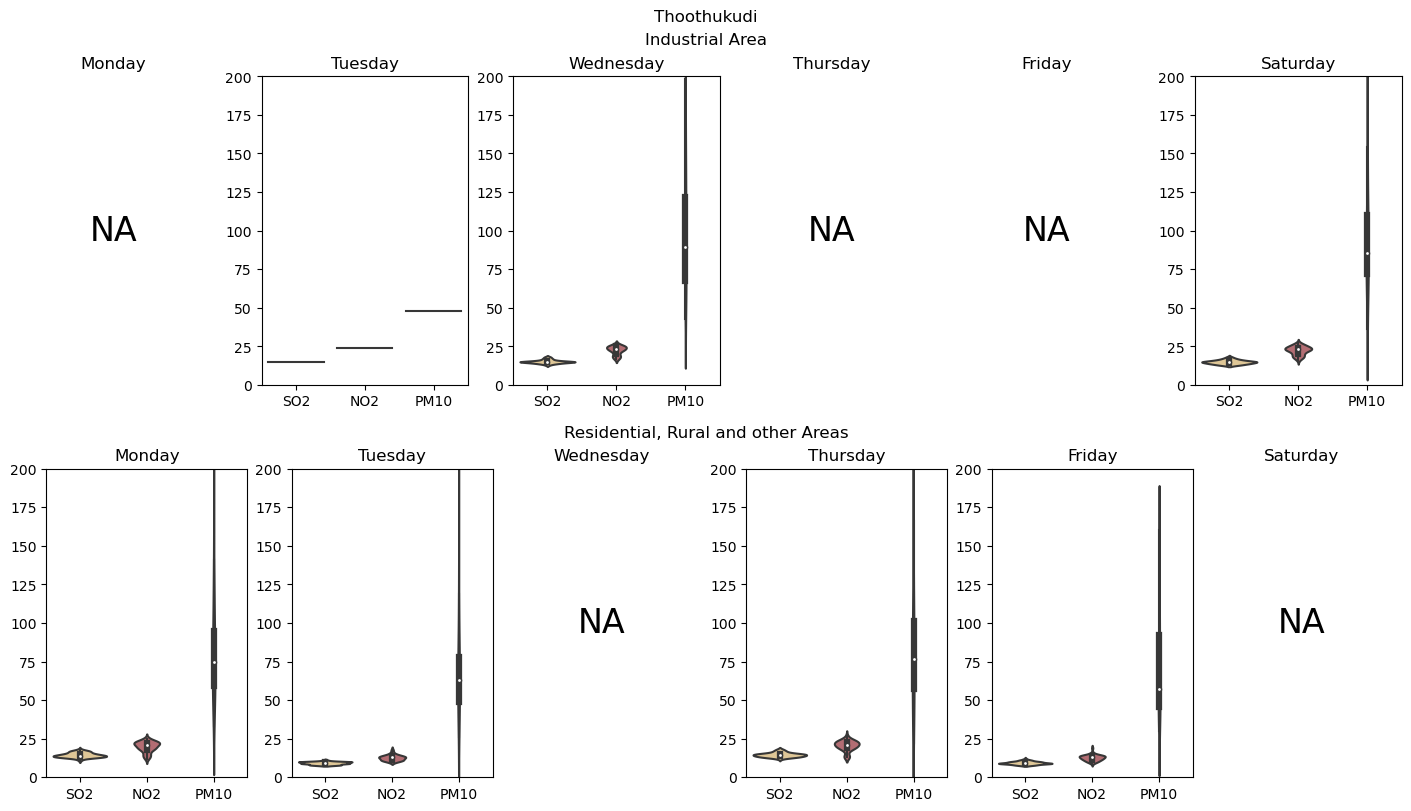

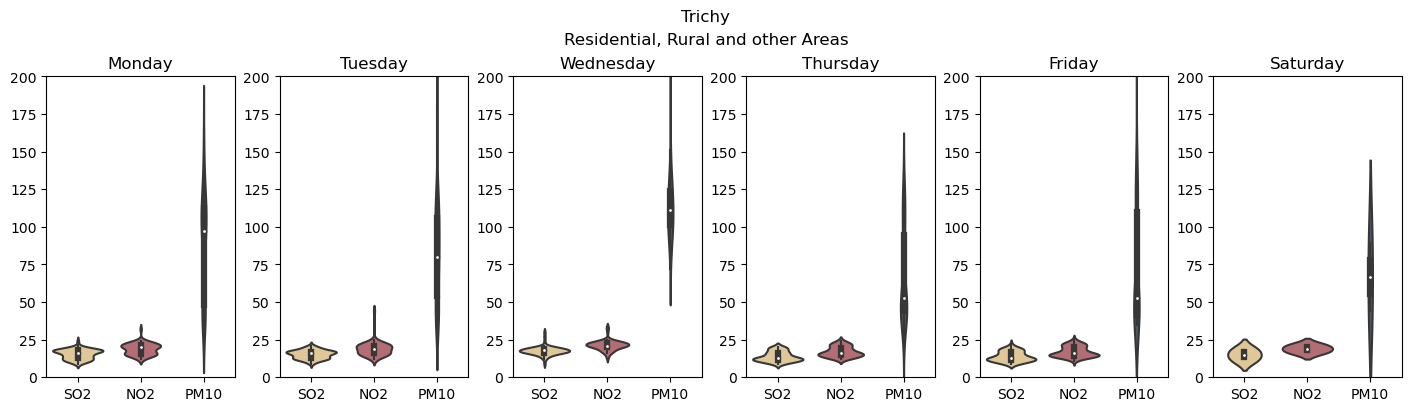

In [16]:
# NO DATA AVAILABLE FOR SUNDAYS, SO I REMOVED SUNDAY FROM THE LIST
def draw_(area):
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    gb_loc = data_by_area[area].groupby("loctype")
    N_ = len(gb_loc)
    
    fig = plt.figure(constrained_layout=True,figsize=(14,4*N_))
    fig.suptitle(area)

    i = 0

    subfigs = fig.subfigures(nrows=N_, ncols=1,)
    
    for name, data_ in gb_loc:
        if N_ >1:
            subfig = subfigs[i]
        else: subfig = subfigs
        axs = subfig.subplots(nrows=1,ncols=len(day_names))
        
        subfig.suptitle(name,fontsize=12)
        
        by_week_days = defaultdict(list)
        
        for _,row in  data_.iterrows():
            
            by_week_days[row["date"].strftime("%A")].append(
                (row["SO2"], row["NO2"],row["RSPM/PM10"])
            )
            
        for idx, day in enumerate(day_names):
            values = np.array(by_week_days[day])
            if len(values)>0:
                temp = pd.DataFrame(values)
                temp.columns = ["SO2","NO2","PM10"]
                
                sns.violinplot(data=temp, ax=axs[idx],palette=[so2_color,no2_color,pm10_color])
                    
                axs[idx].set_ylim(0,200)
            else:
                axs[idx].axis('off')
                axs[idx].text(0.5, 0.5, "NA", fontsize=24, ha='center', va='center')
            axs[idx].set_title(day)
        
        i+=1
        
    plt.show()
        

for area in data_by_area.keys():
    draw_(area)          

## SO2, NO2, & PM10 in Every Area and Location Type, Regression Line, With Important Holidays Marked

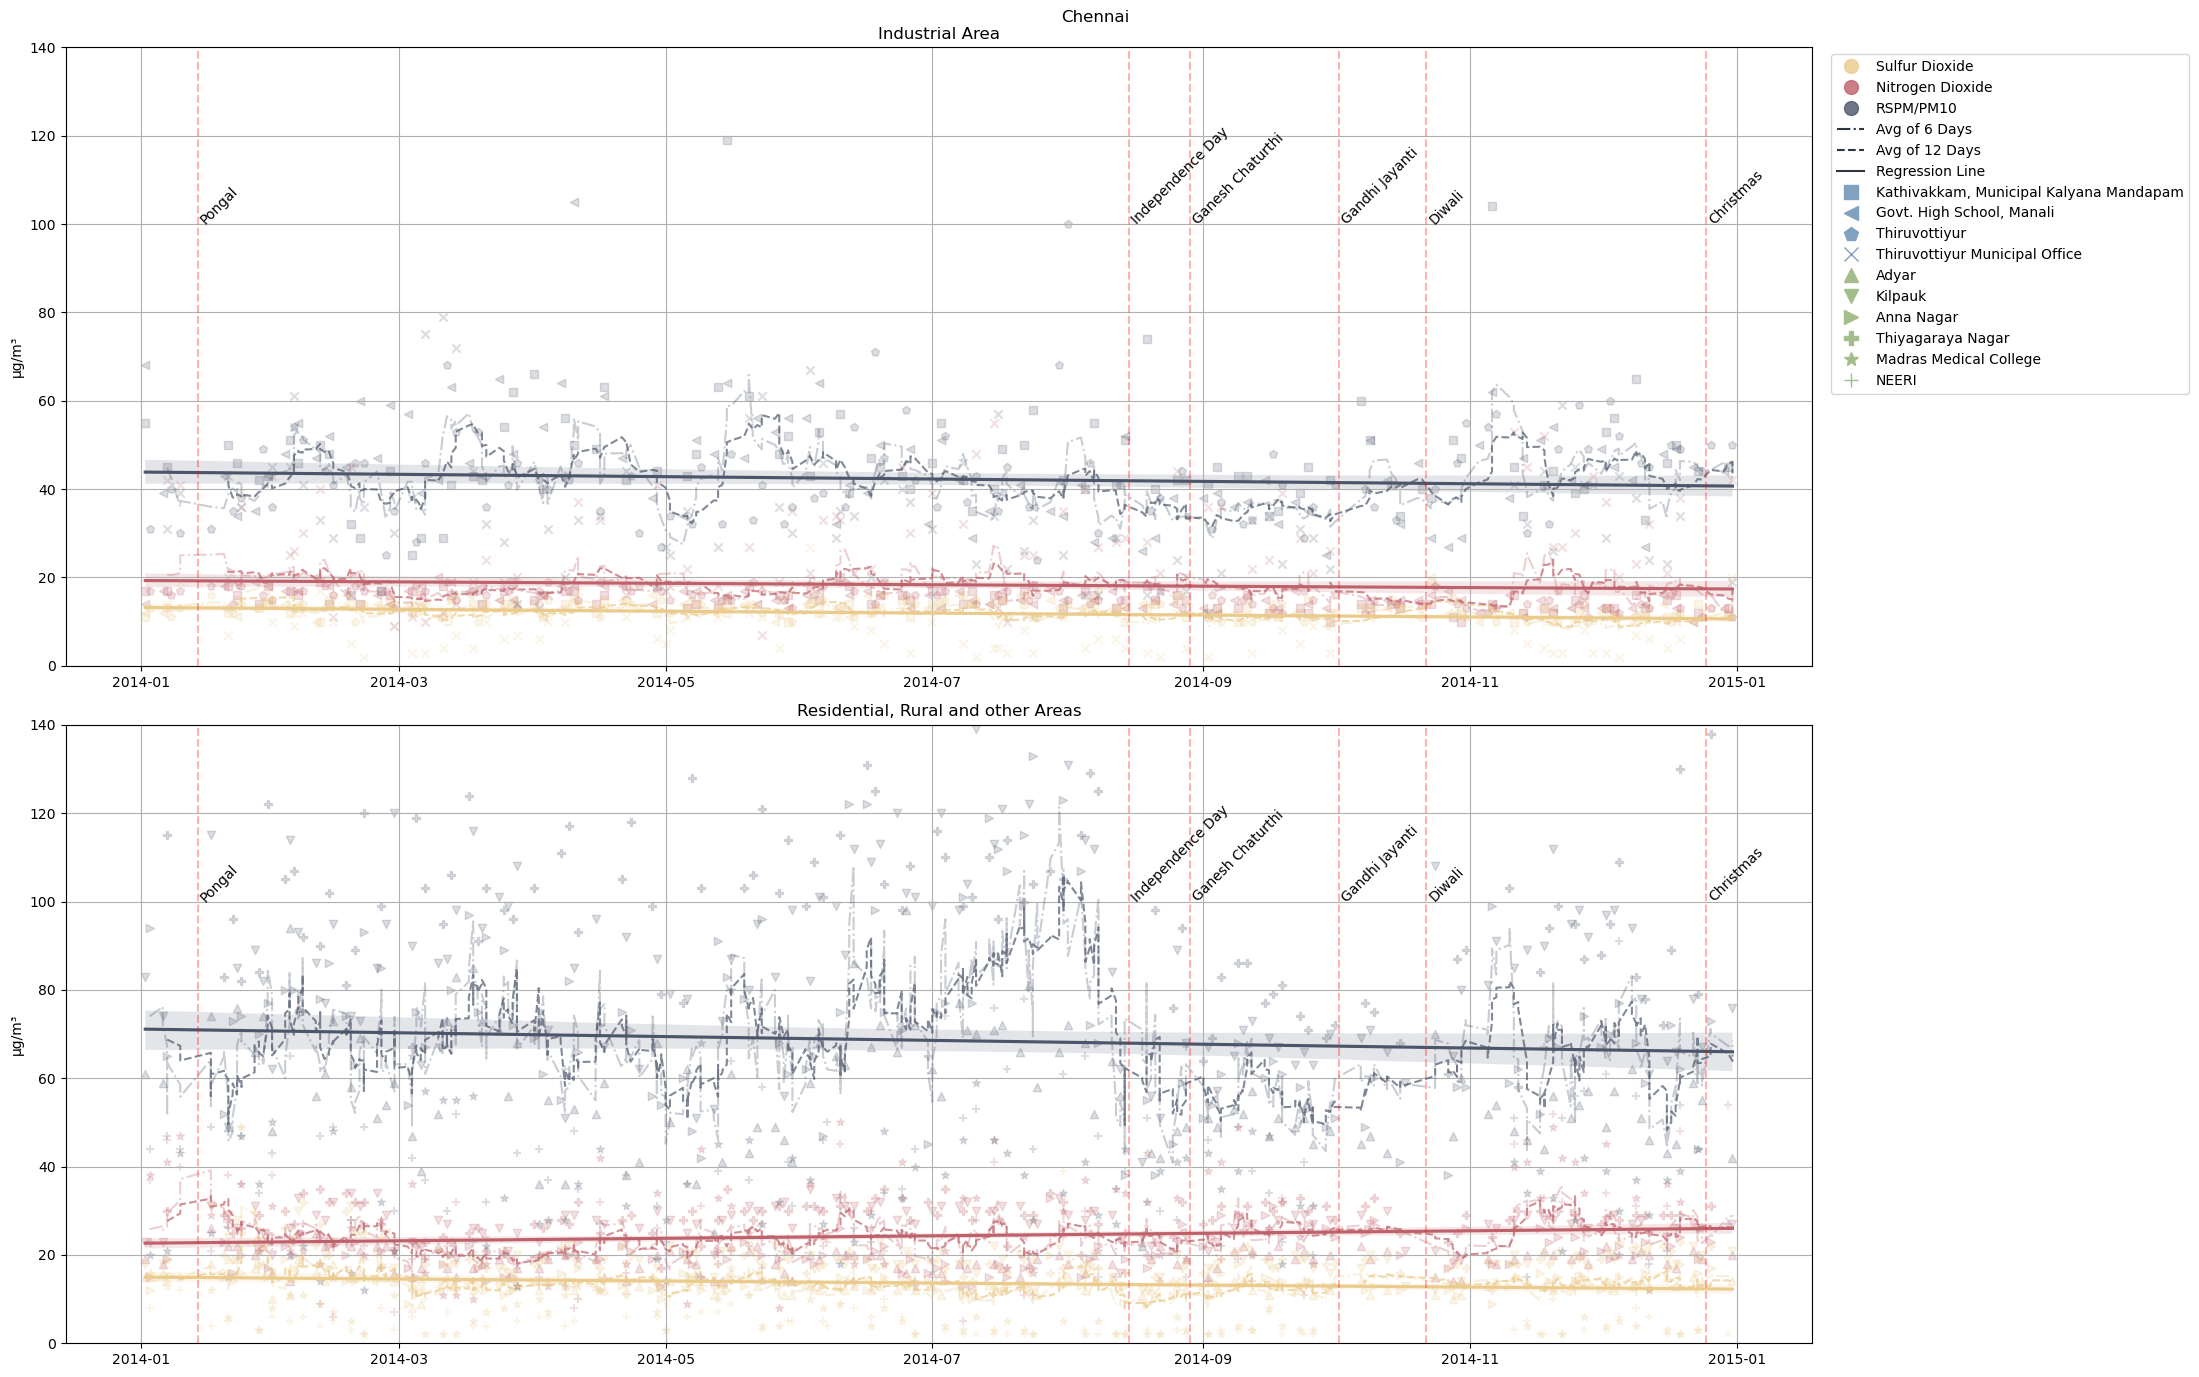

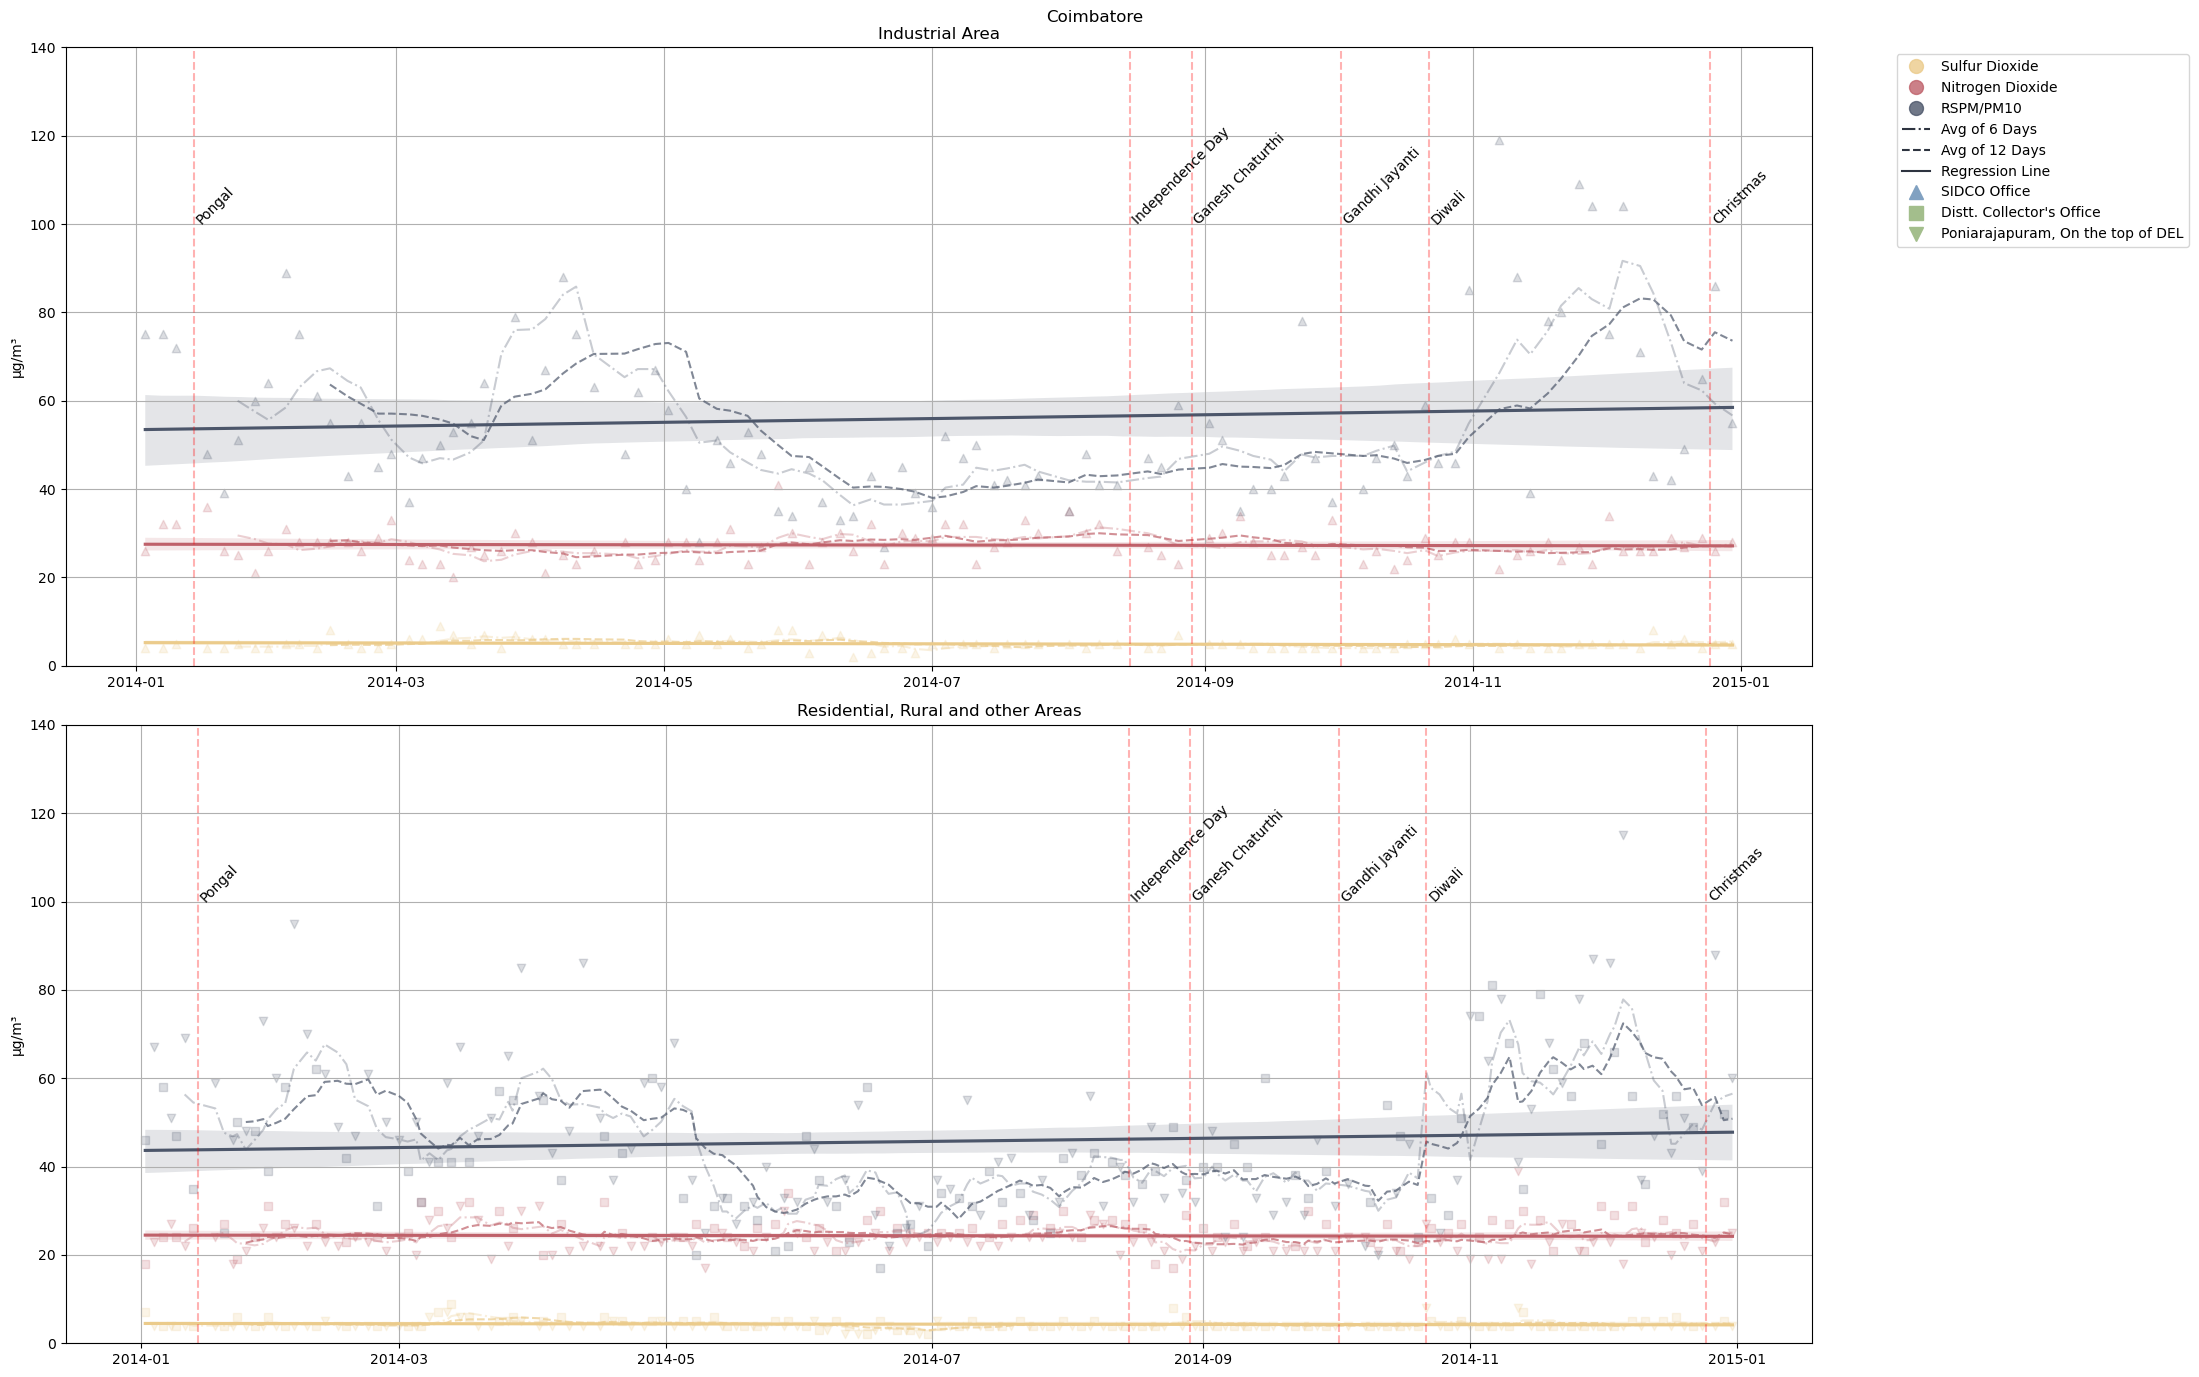

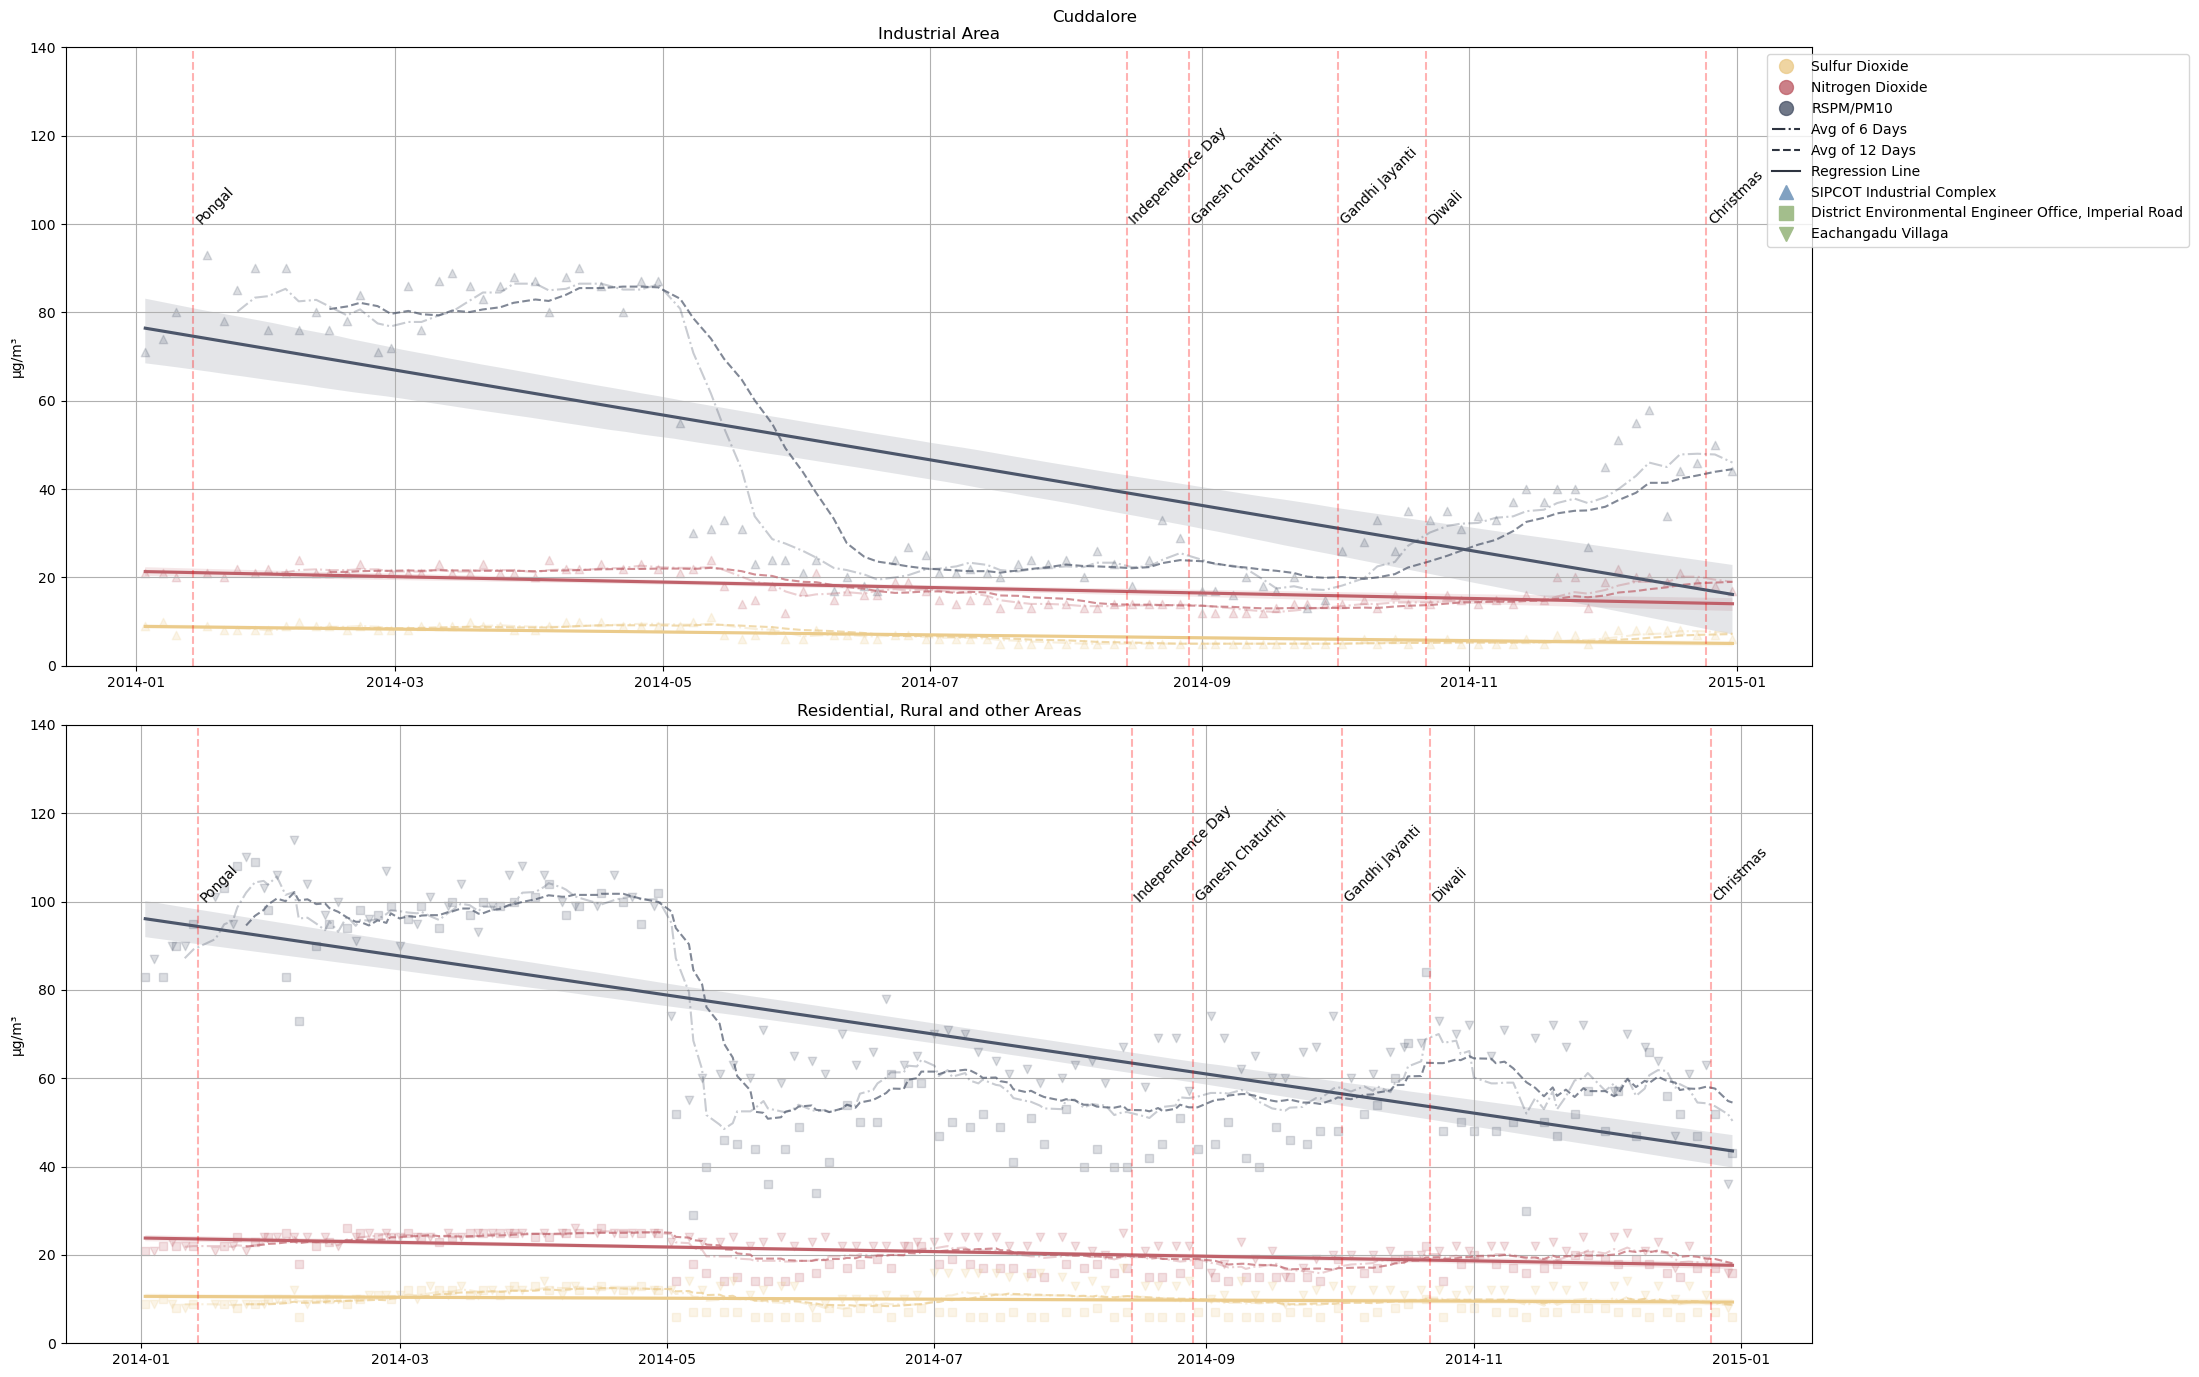

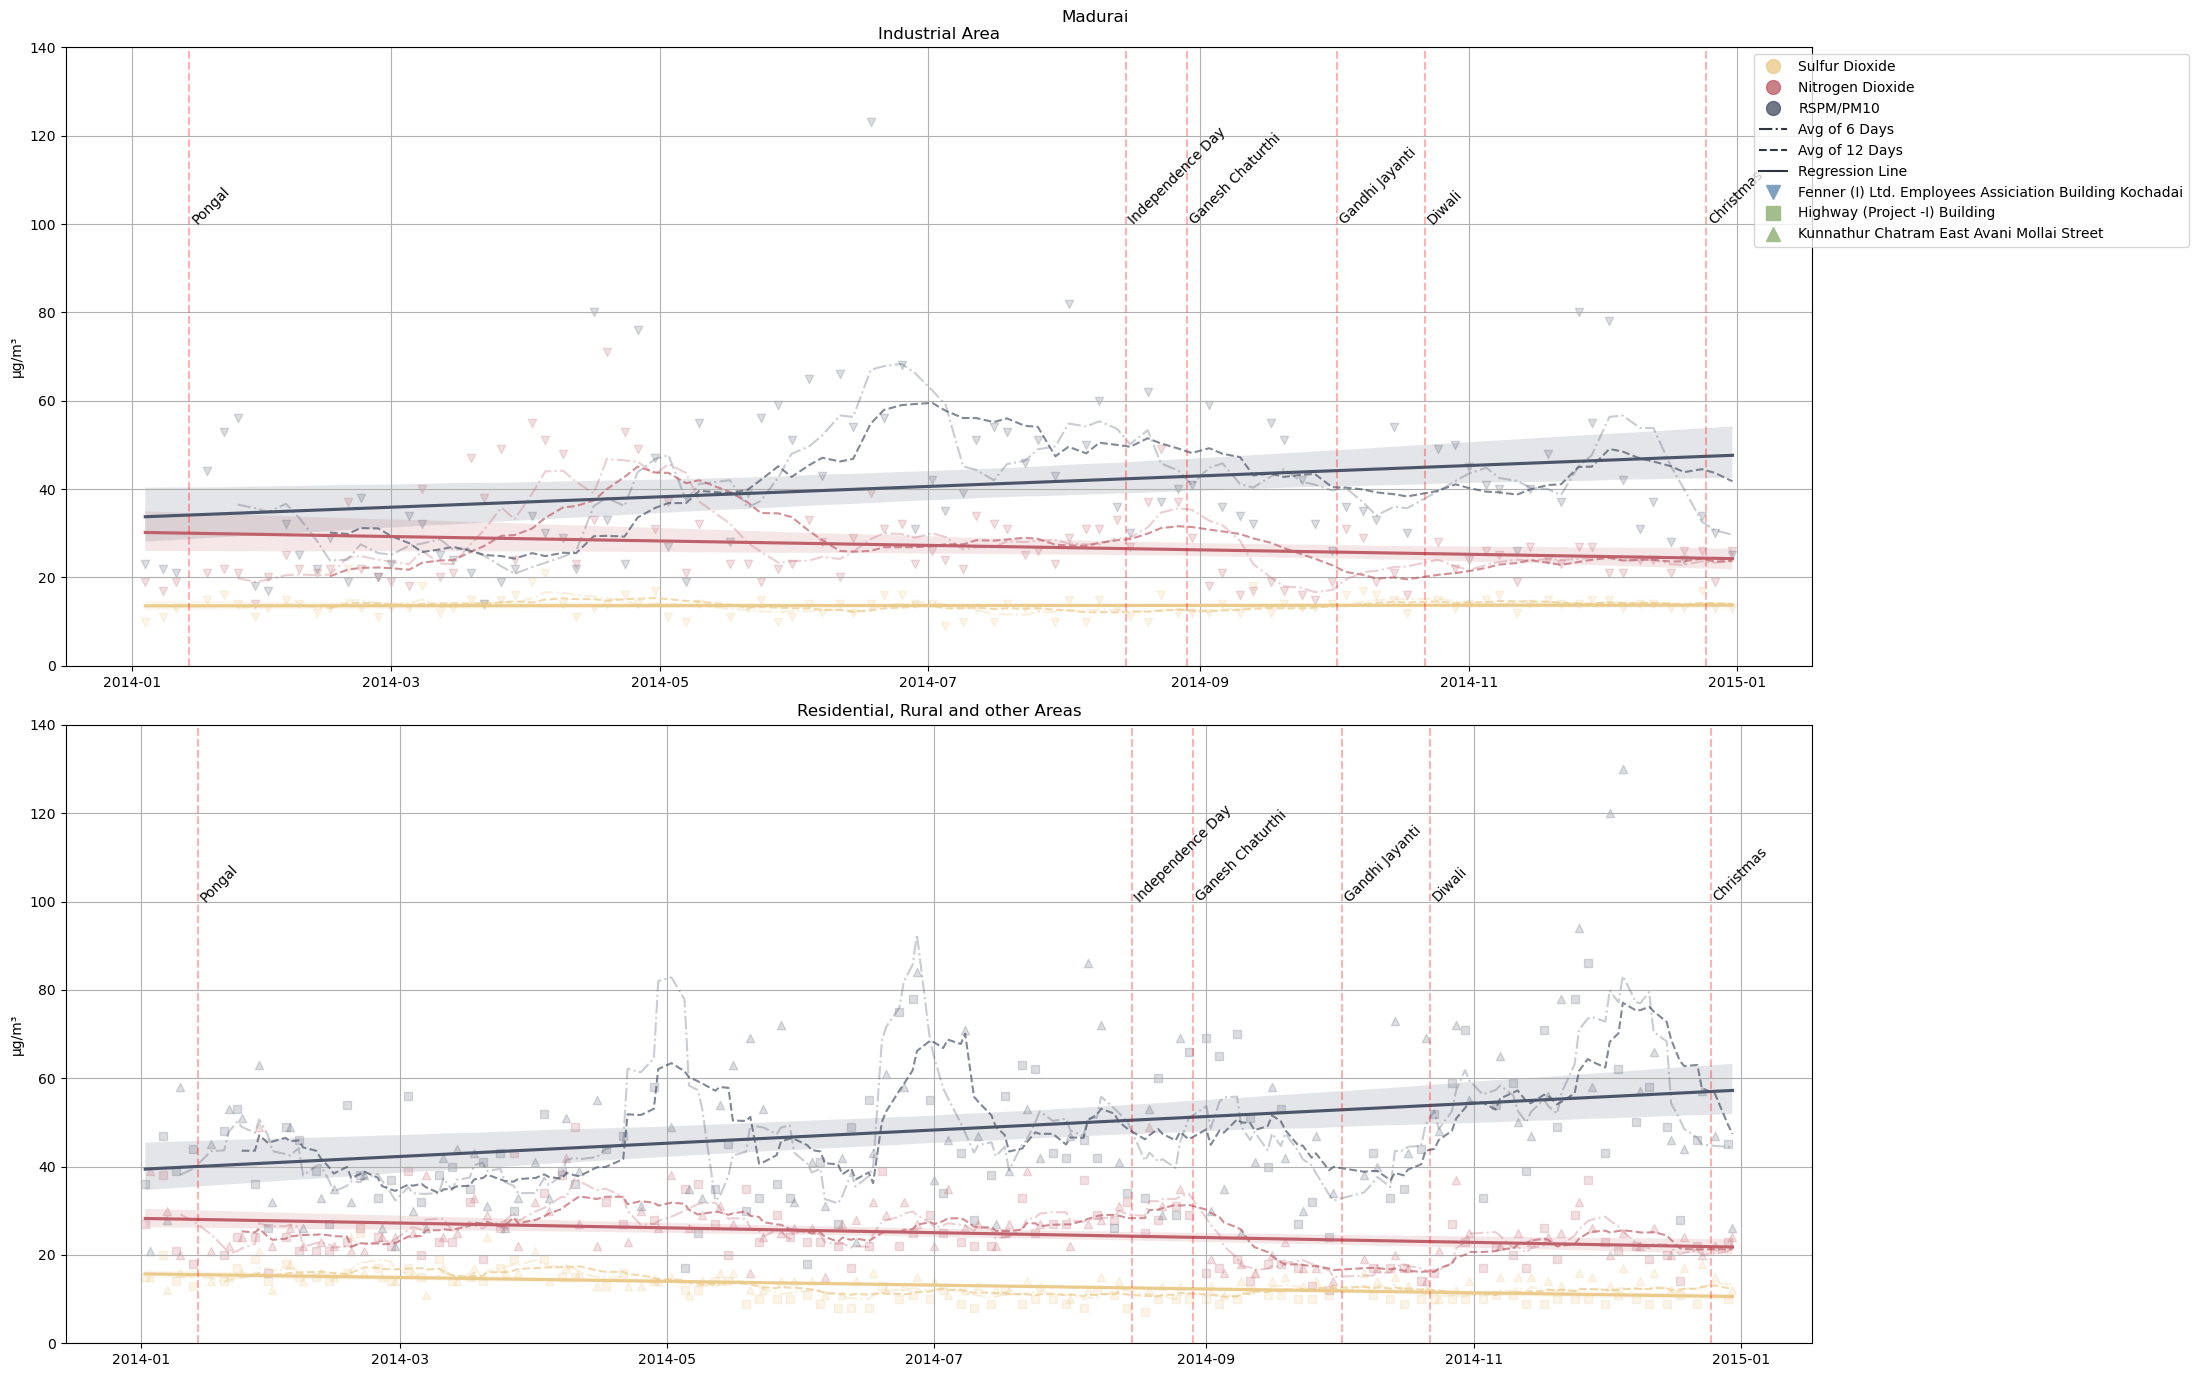

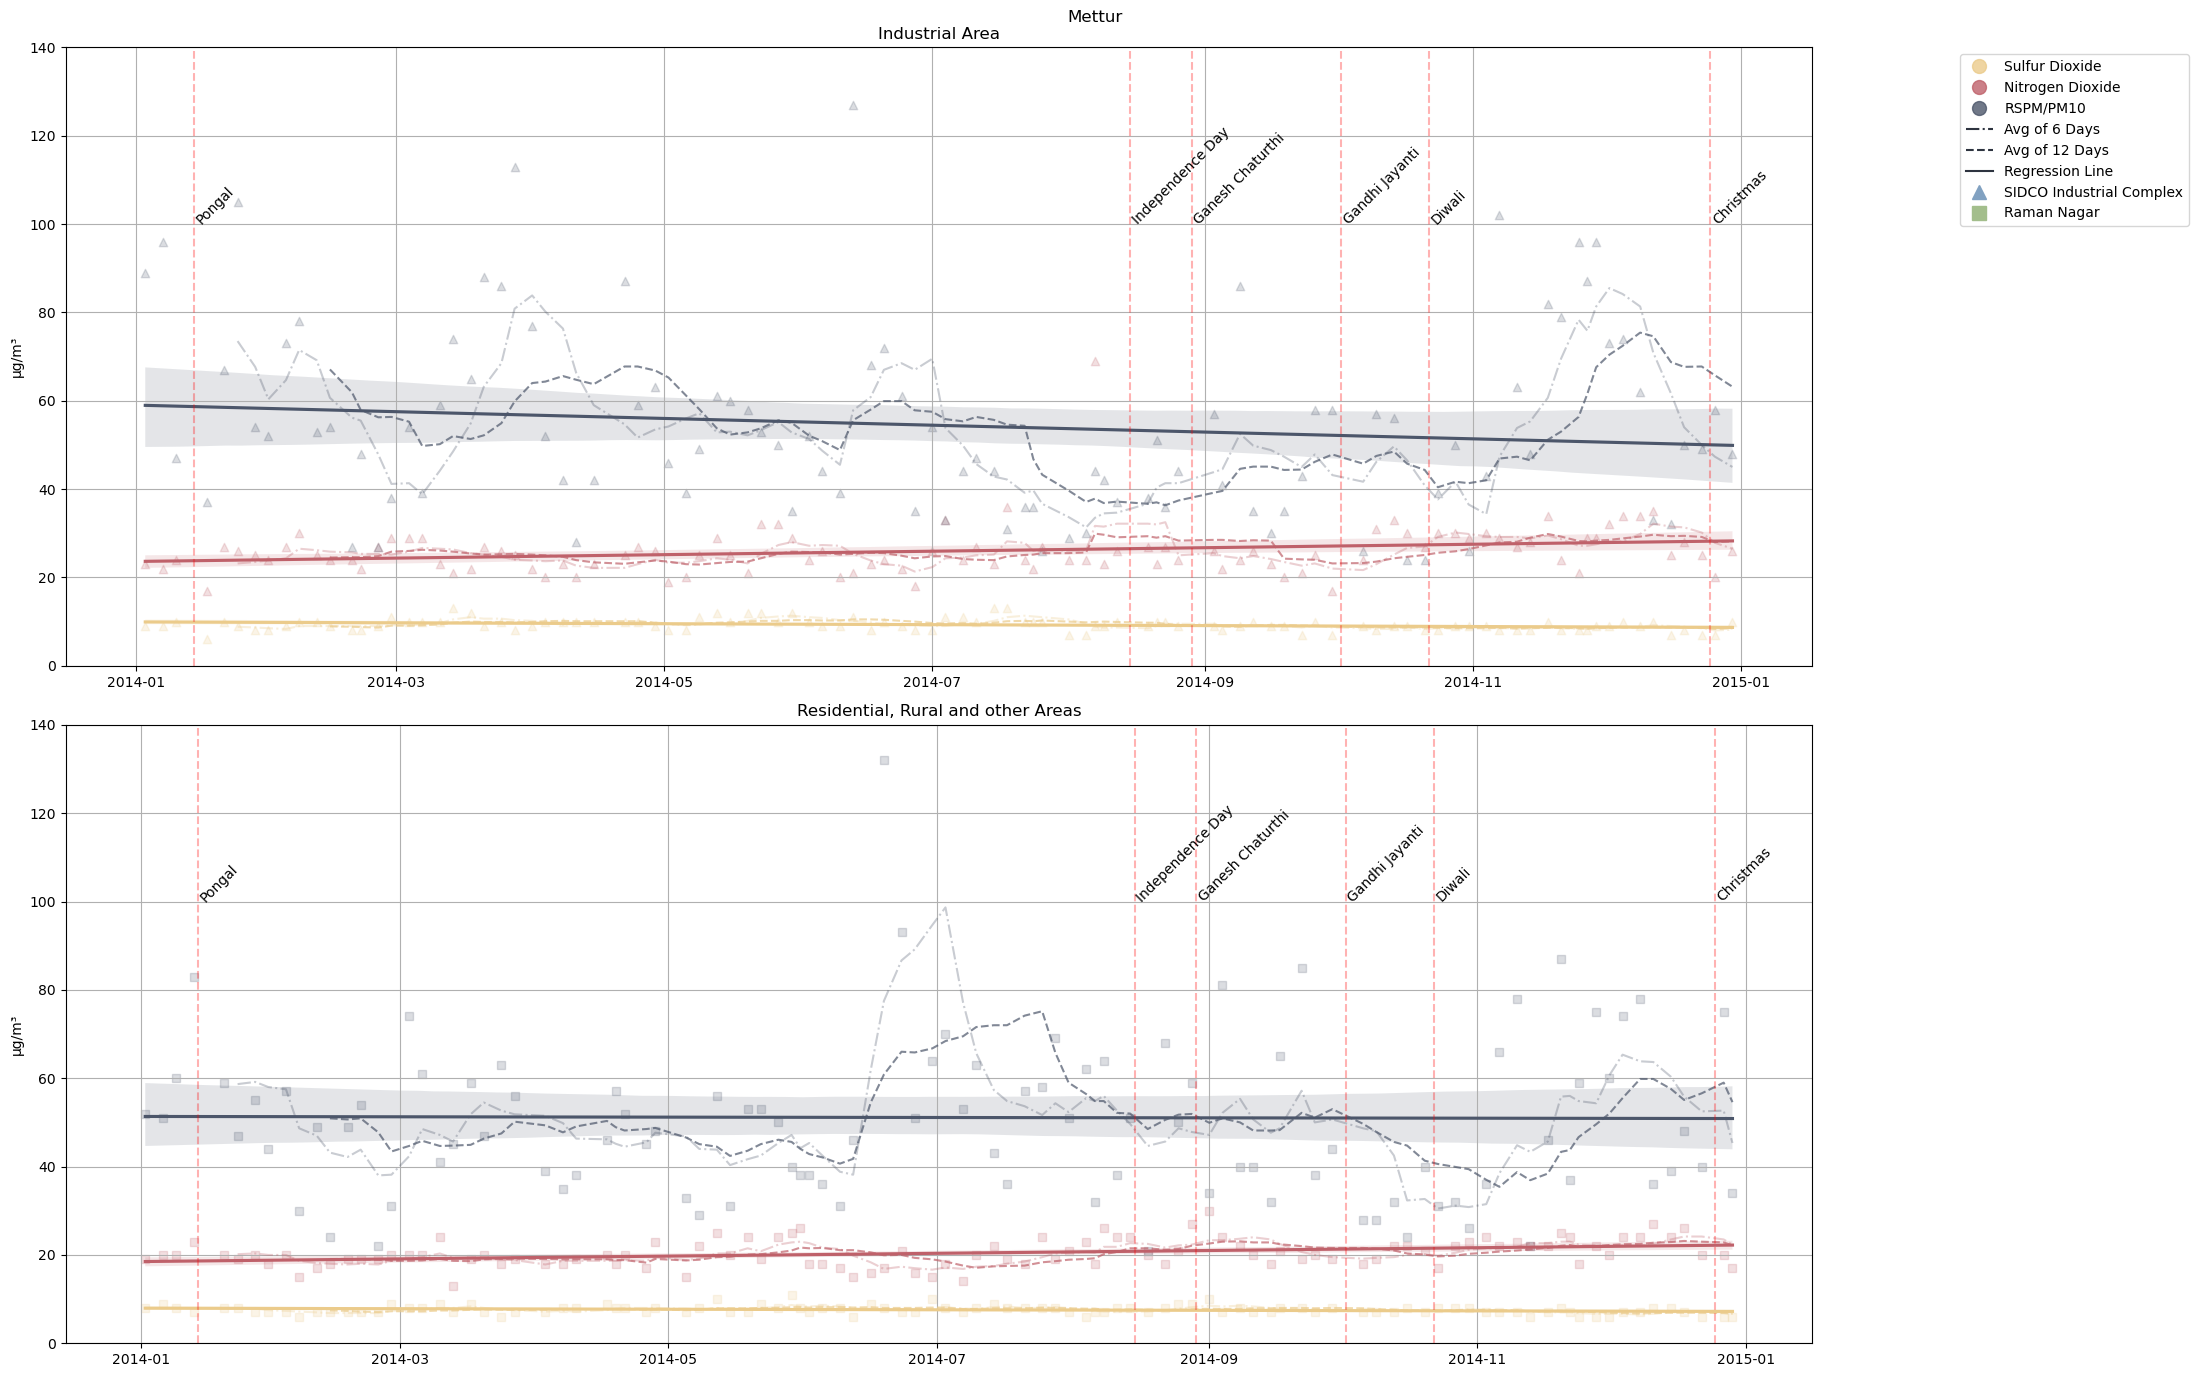

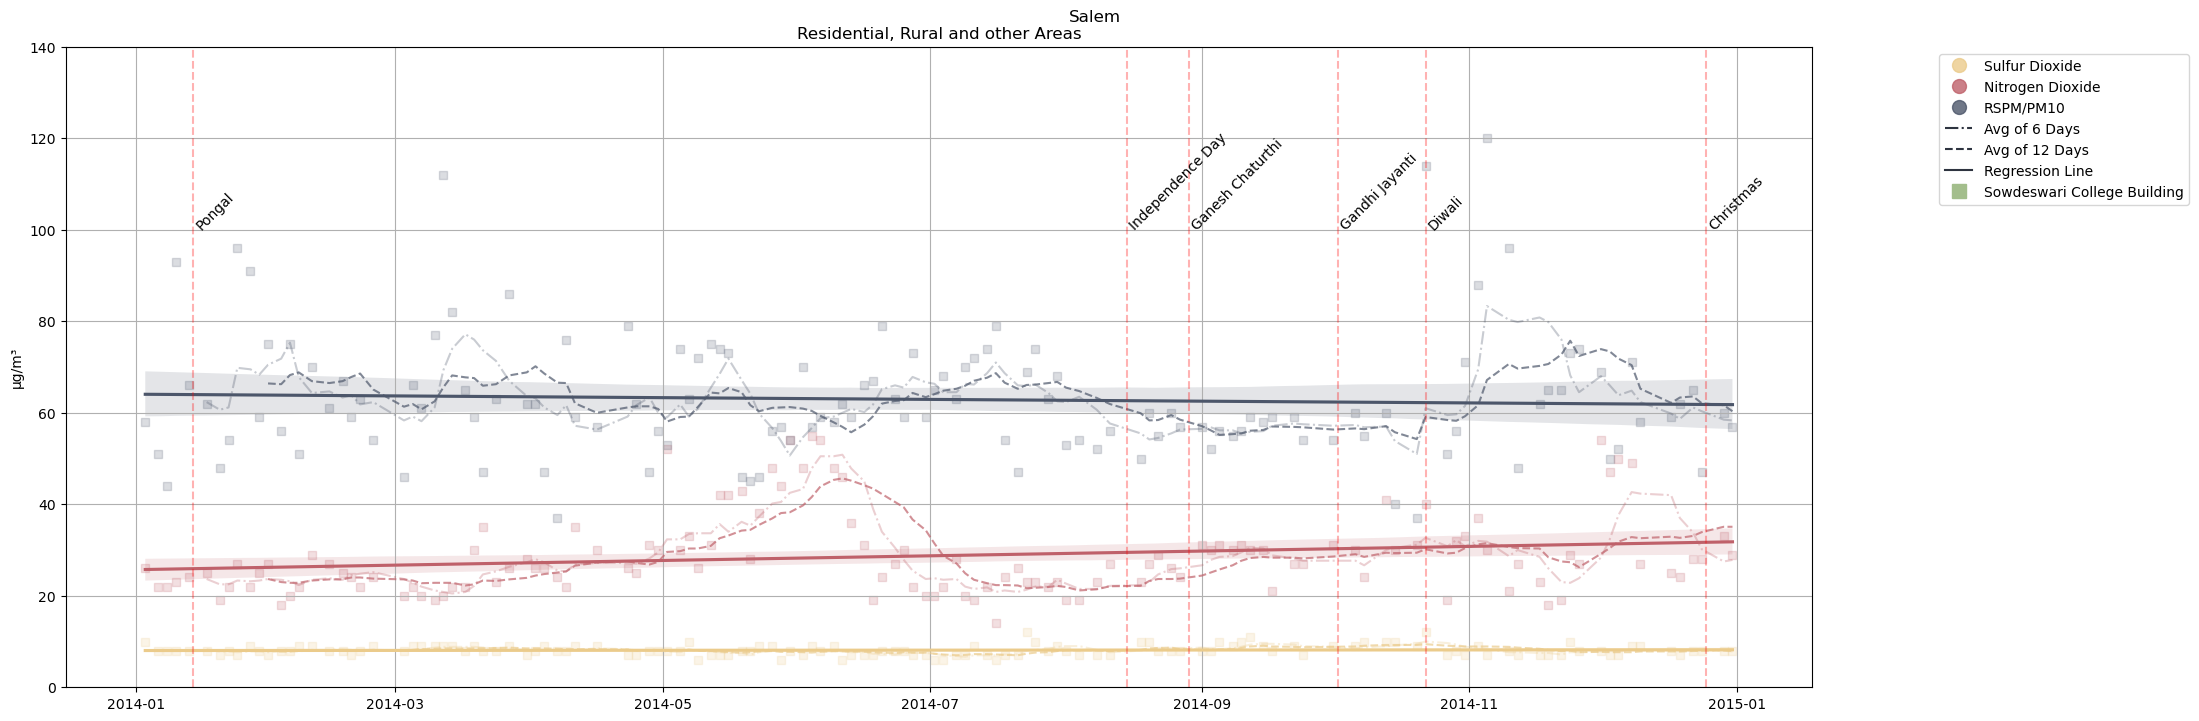

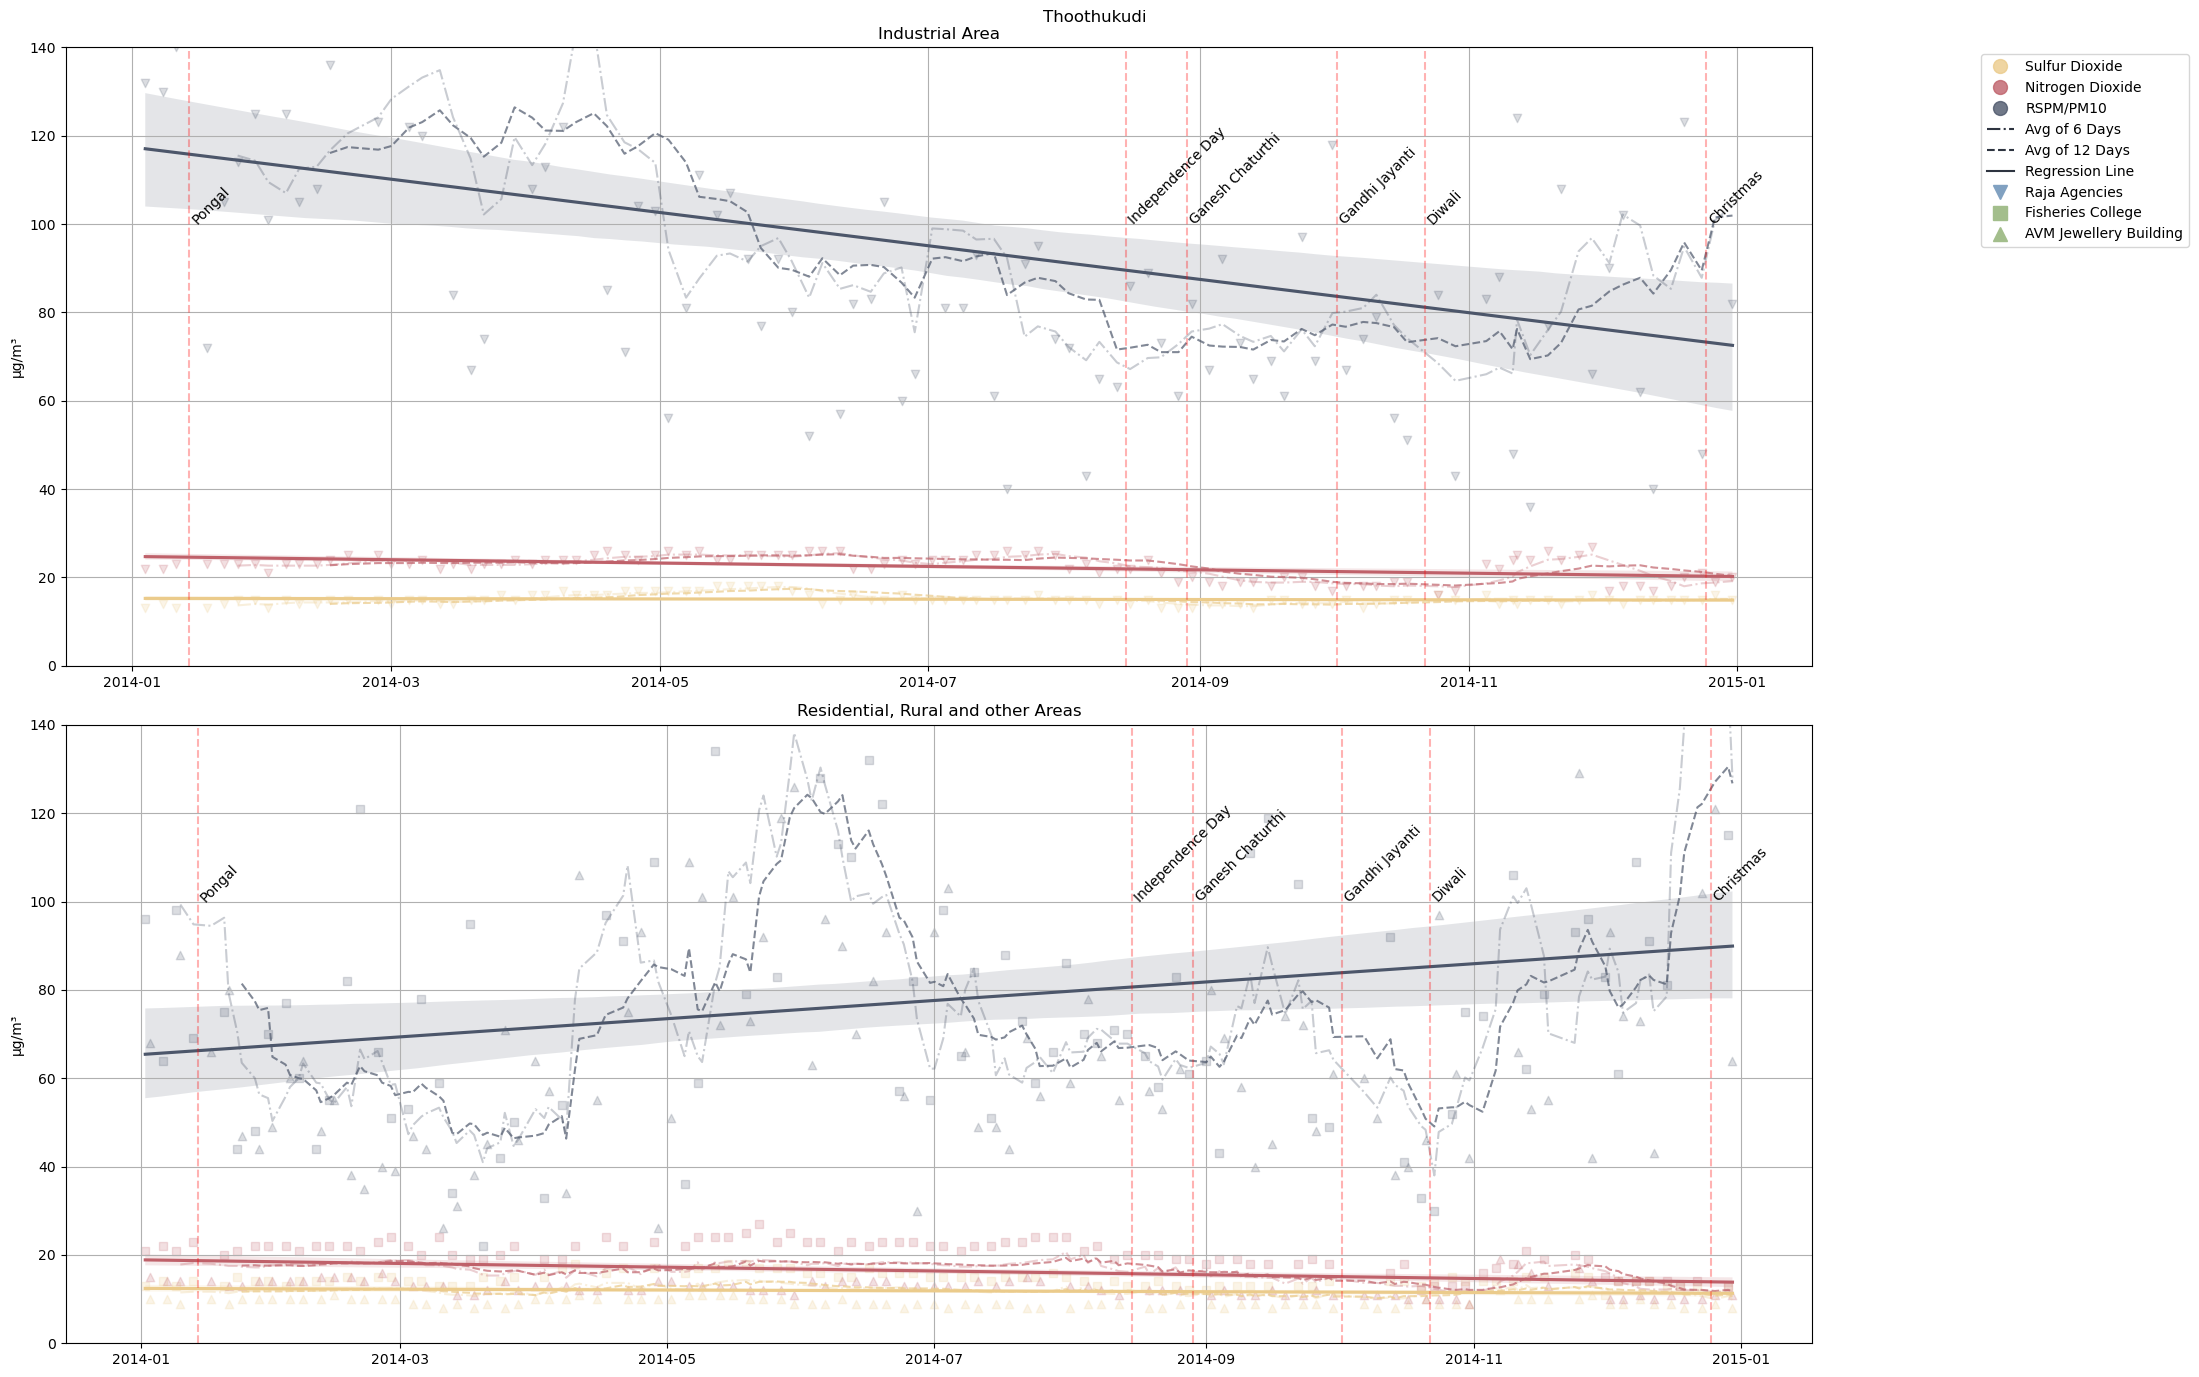

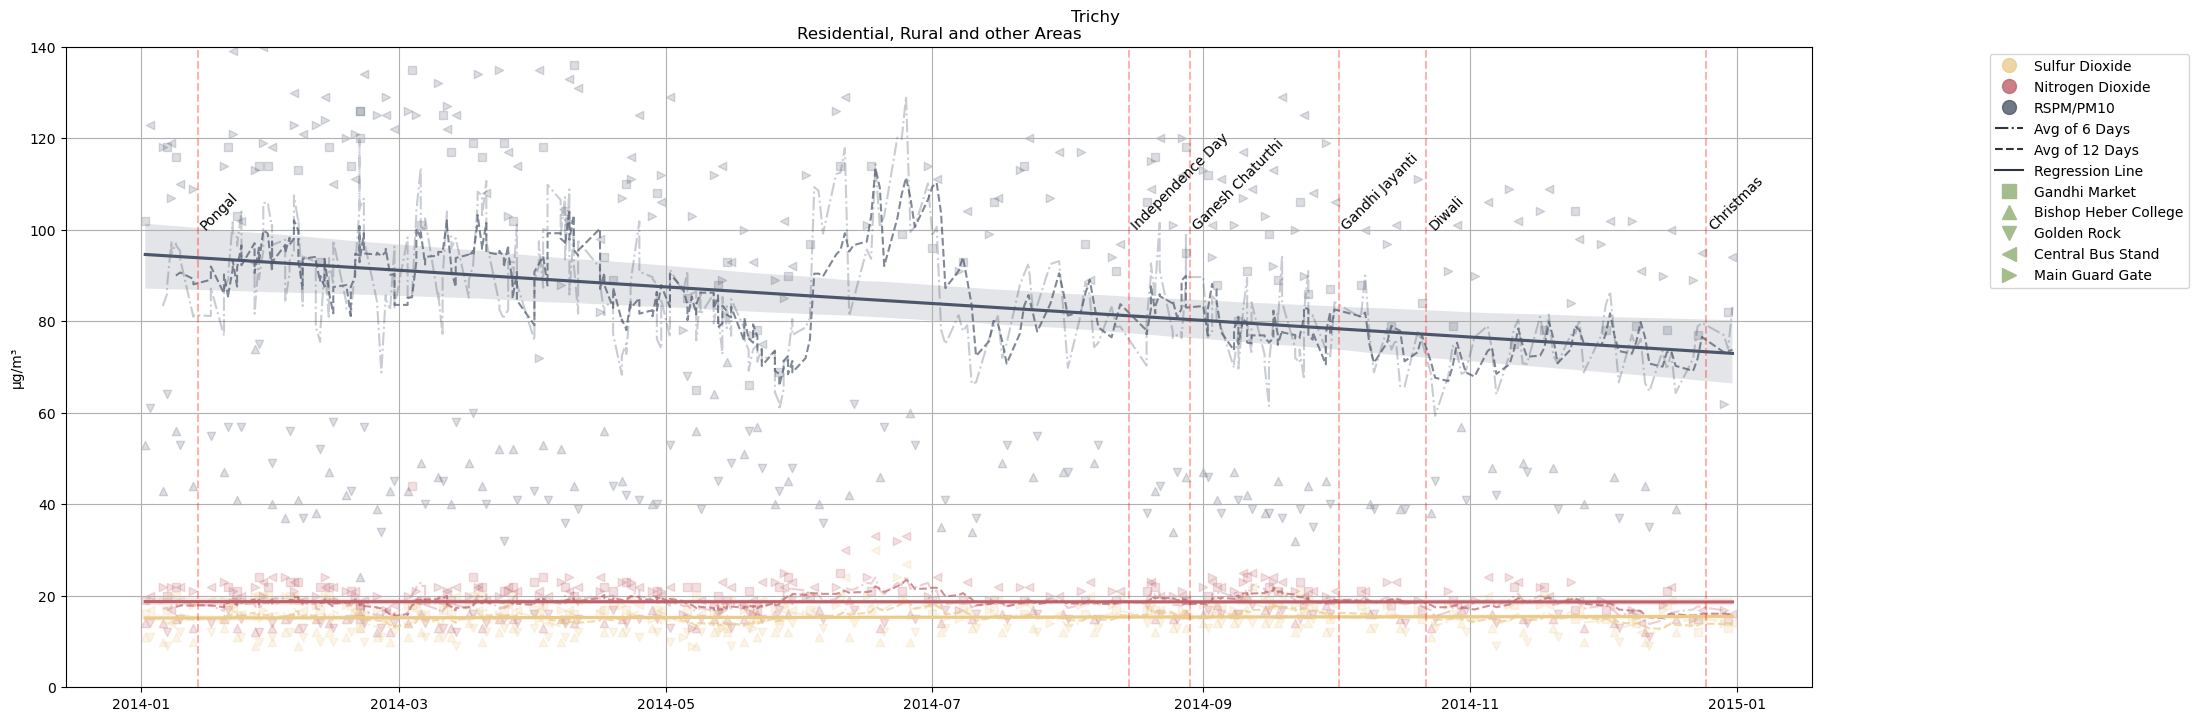

In [17]:
# ADD MORE IMPORTANT DATES
event_dates = {
    "Diwali": "2014-10-22",
    "Christmas": "2014-12-25",
    "Pongal": "2014-01-14",
    "Independence Day": "2014-08-15",
    "Ganesh Chaturthi": "2014-08-29",
    "Gandhi Jayanti": "2014-10-02",
}

def draw_vertical_lines(events,ax,y_cord=50):
    for key,val in events.items():
        x_val = datetime.strptime(val, "%Y-%m-%d")
        ax.axvline(x=x_val, color='red', linestyle='--',alpha=.3,)
        ax.text(x_val, y_cord, key, color='black',rotation=45)        

markers = ['s', '^', 'v', '<', '>', 'p', 'P', '*', '+', 'x', 'D', 'd', 'H', 'h']

def draw_(area,mark_alpha = 0.2,d3_alpha=0.3,reg_alpha=1,d7_alpha=.7):
    fig, axes = plt.subplots(nrows=2,ncols =1,figsize=(22,14))
    stn_marker_map = {stn_name: markers[i] for i, stn_name in enumerate(data_by_area[area]["loc"].unique())}
    station_name_legends = []
    for i, (name, data_) in enumerate(data_by_area[area].groupby("loctype")):

        # Raw Data Points
        for stn_name in data_["loc"].unique():
            marker = stn_marker_map[stn_name]
            _data_ = data_[data_["loc"] == stn_name]
            stn_name = stn_name[:stn_name.rfind(",")]
            axes[i].scatter(_data_.date,_data_.SO2,color=so2_color,alpha=mark_alpha,marker=marker)
            axes[i].scatter(_data_.date,_data_.NO2, color = no2_color,alpha=mark_alpha,marker=marker)
            axes[i].scatter(_data_.date,_data_["RSPM/PM10"],alpha=mark_alpha,marker=marker, color=pm10_color)
            station_name_legends.append(   
                Line2D([0], [0], color="#81A1C1" if name == unique_loctyp[0] else "#A3BE8C", marker=marker, linestyle='', markersize=10, label=stn_name)
            )

        # Average of 6 days 
        axes[i].plot(data_['date'], data_['SO2'].rolling(window=6).mean(), color=so2_color, alpha=d3_alpha,linestyle="-.")
        axes[i].plot(data_['date'], data_['NO2'].rolling(window=6).mean(), color=no2_color, alpha=d3_alpha,linestyle="-.")
        axes[i].plot(data_['date'],data_['RSPM/PM10'].rolling(window=6).mean(), color=pm10_color, alpha=d3_alpha,linestyle="-.")

        # Average of 12 Days
        axes[i].plot(data_['date'], data_['SO2'].rolling(window=12).mean(), color=so2_color, alpha=d7_alpha,linestyle="--")
        axes[i].plot(data_['date'], data_['NO2'].rolling(window=12).mean(), color=no2_color, alpha=d7_alpha,linestyle="--")
        axes[i].plot(data_['date'],data_['RSPM/PM10'].rolling(window=12).mean(), color=pm10_color, alpha=d7_alpha,linestyle="--")

        # Regression Line
        sns.regplot(x=date2num(data_['date']),y=data_['SO2'], ci=95,color=so2_color, line_kws={'alpha': reg_alpha}, scatter=False,ax=axes[i])
        sns.regplot(x=date2num(data_['date']),y=data_['NO2'], ci=95,color=no2_color, line_kws={'alpha': reg_alpha}, scatter=False,ax=axes[i])
        sns.regplot(x=date2num(data_['date']),y=data_['RSPM/PM10'], ci=95,color=pm10_color, line_kws={'alpha': reg_alpha}, scatter=False,ax=axes[i])
        


        axes[i].set_title(name)
        axes[i].set_ylabel("µg/m³")
        axes[i].set_ylim(0,140)
        axes[i].grid(True)
        draw_vertical_lines(event_dates,axes[i],100)

    if i != 1:
        axes[1].remove()
    
    common_color = "#2E3440"
    custom_legend = [
        Line2D([0], [0],alpha=0.8, color=so2_color, marker='o', linestyle='', markersize=10, label='Sulfur Dioxide'),
        Line2D([0], [0],alpha=0.8, color=no2_color, marker='o', linestyle='', markersize=10, label='Nitrogen Dioxide'),
        Line2D([0], [0],alpha=0.8, color=pm10_color, marker='o', linestyle='', markersize=10, label='RSPM/PM10'),
        Line2D([0], [0], color=common_color, marker='', linestyle='-.', markersize=10, label='Avg of 6 Days'),
        Line2D([0], [0], color=common_color, marker='', linestyle='--', markersize=10, label='Avg of 12 Days'),
        Line2D([0], [0], color=common_color, marker='', linestyle='-', markersize=10, label='Regression Line'),
        *station_name_legends
    ]
    
    axes[0].legend(loc='upper right', bbox_to_anchor=(1.22, 1),handles=custom_legend)
    plt.suptitle(area)
    plt.tight_layout()
    plt.show()

for area in data_by_area.keys():
    draw_(area)

## Geo Spatial Heatmap

In [18]:
def move_coordinates(lat, lon, min_dist=100, max_dist=5000):
    earth_radius = 6371000

    lat_rad = math.radians(lat)
    lon_rad = math.radians(lon)

    random_angle = random.uniform(0, 2 * math.pi)
    distance_meters = random.uniform(min_dist, max_dist)
    
    new_lat = lat_rad + (distance_meters / earth_radius) * math.cos(random_angle)
    new_lon = lon_rad + (distance_meters / earth_radius) * math.sin(random_angle)

    new_lat = math.degrees(new_lat)
    new_lon = math.degrees(new_lon)

    return new_lat, new_lon

def scale_01(curr, max_val, min_val):
    return (curr - min_val) / (max_val - min_val)
    
def create_data_for_heatmap(data,duplicates=0):
    station_cord_map = stn_df.set_index("name")
    max__ = desc.loc["max"]
    min__ = desc.loc["min"]
    so2_full = []
    no2_full = []
    pm10_full = []
    time_index = []
    for date, group in data.groupby("date"):
        time_index.append(date.strftime("%Y-%m-%d"))
        so2_data = []
        no2_data = []
        pm10_data = []
        for _,row in group.iterrows():
            lat, lon = station_cord_map.loc[row["loc"]]["coord"]
            SO2 = scale_01(row["SO2"],max__[0],min__[0])
            NO2 = scale_01(row["NO2"],max__[1],min__[1])
            PM10 = scale_01(row["RSPM/PM10"],max__[2],min__[2])
            for dup in range(duplicates+1):
                if dup == 0:
                    lat_,lon_ = lat, lon    
                else:
                    lat_, lon_ = move_coordinates(lat,lon)
                so2_data.append(
                    [lat_,lon_,SO2]
                )
                no2_data.append(
                    [lat_,lon_,NO2]
                )
                pm10_data.append(
                    [lat_,lon_,PM10]
                )
        so2_full.append(so2_data)
        no2_full.append(no2_data)
        pm10_full.append(pm10_data)
    return so2_full,no2_full,pm10_full, time_index



A,B,C,time_index = create_data_for_heatmap(data,0)

class HeatMapWithTimeAdditional(Layer):
    _template = Template("""
        {% macro script(this, kwargs) %}
            var {{this.get_name()}} = new TDHeatmap({{ this.data }},
                {heatmapOptions: {
                    radius: {{this.radius}},
                    minOpacity: {{this.min_opacity}},
                    maxOpacity: {{this.max_opacity}},
                    scaleRadius: {{this.scale_radius}},
                    useLocalExtrema: {{this.use_local_extrema}},
                    defaultWeight: 1,
                    {% if this.gradient %}gradient: {{ this.gradient }}{% endif %}
                }
            }).addTo({{ this._parent.get_name() }});
        {% endmacro %}
    """)

    def __init__(self, data, name=None, radius=15,
                 min_opacity=0, max_opacity=0.6,
                 scale_radius=False, gradient=None, use_local_extrema=False,
                 overlay=True, control=True, show=True):
        super(HeatMapWithTimeAdditional, self).__init__(
            name=name, overlay=overlay, control=control, show=show
        )
        self._name = 'HeatMap'
        self.data = data

        # Heatmap settings.
        self.radius = radius
        self.min_opacity = min_opacity
        self.max_opacity = max_opacity
        self.scale_radius = 'true' if scale_radius else 'false'
        self.use_local_extrema = 'true' if use_local_extrema else 'false'
        self.gradient = gradient
tn_map = folium.Map(location=[10.5, 79],tiles="stamentoner", zoom_start=7.4)    

HeatMapWithTime(A,name="SO2",index=time_index,radius=30,max_opacity=0.9,gradient={0.4: 'blue', 0.65: 'green', 1: 'red'}).add_to(tn_map)
HeatMapWithTimeAdditional(B,name="NO2",radius=30,max_opacity=0.9,gradient={0.4: 'purple', 0.65: 'orange', 1: 'yellow'}).add_to(tn_map)
HeatMapWithTimeAdditional(C,name="RSPM/PM10",radius=30,max_opacity=0.9,gradient={0.4: 'cyan', 0.65: 'magenta', 1: 'black'}).add_to(tn_map)


folium.LayerControl(collapsed=False).add_to(tn_map)
tn_map.save('geo_spatial_aq_heatmap.html')
tn_map

## Heat Map of Correlations between SO2, NO2, Location Type & PM10.

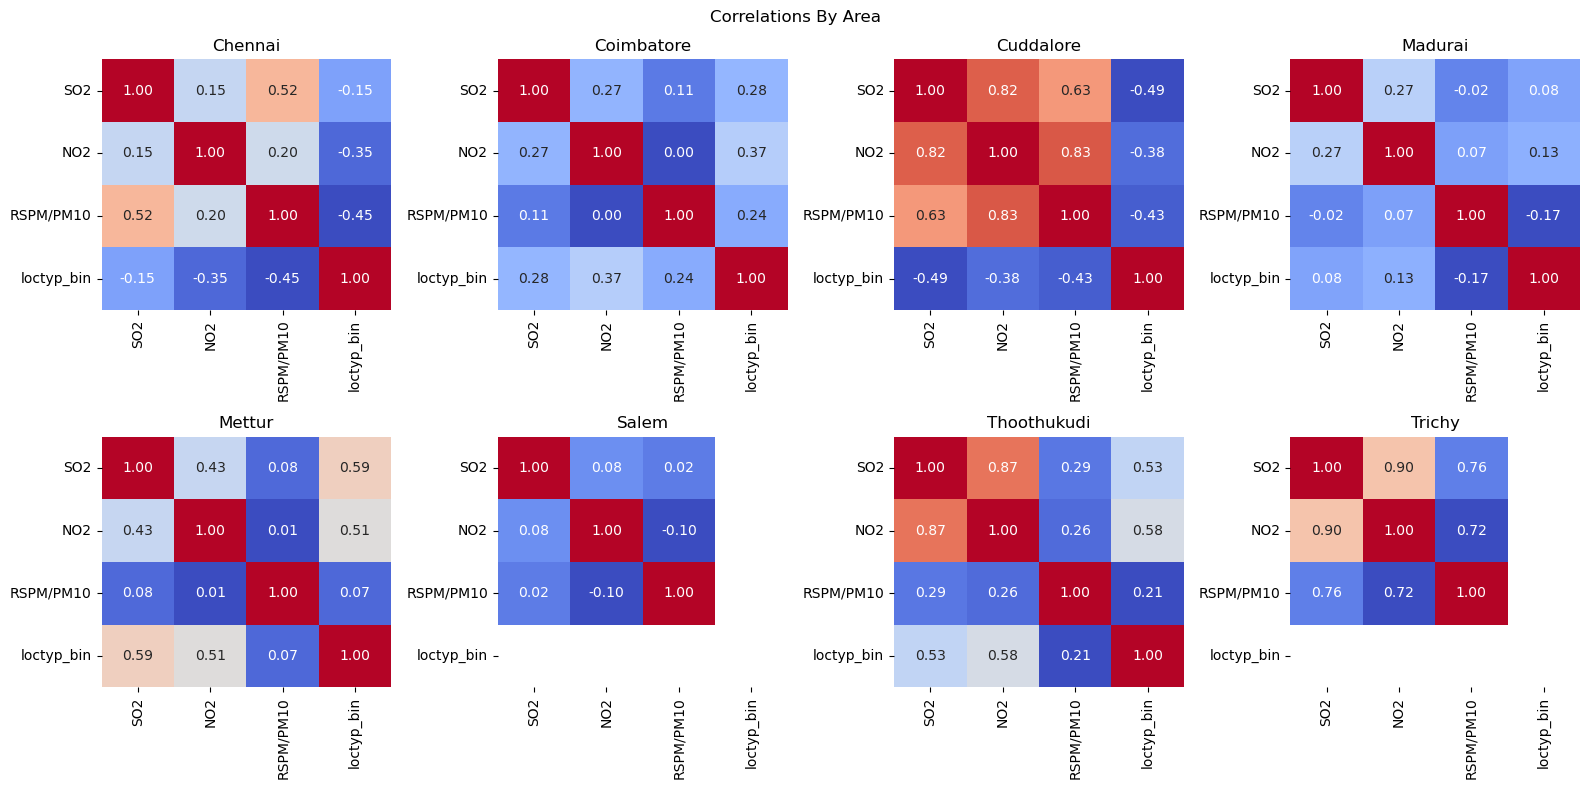

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

for i, area in enumerate(unique_areas):
    row, col = divmod(i, 4)  # Calculate the row and column for the current area
    ax = axes[row, col]  # Select the current subplot
    temp = data_by_area[area]
    if "loctyp_bin" not in data.columns:
        temp["loctyp_bin"] = temp["loctype"].apply(lambda x: 1 if x[0] == "I" else 0)
    corr_matrix = temp.corr(numeric_only=True)
    
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0, cbar=False, ax=ax)
    del temp
    ax.set_title(area)
plt.suptitle("Correlations By Area")
plt.tight_layout()
plt.show()

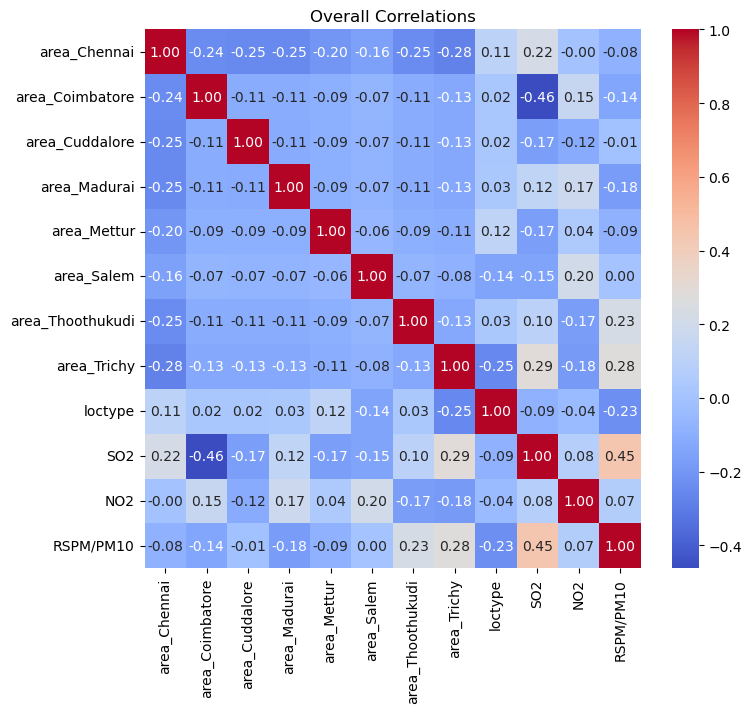

In [20]:
data["loctyp_bin"] = data["loctype"].apply(lambda x: 1 if x[0] == "I" else 0)

X = pd.get_dummies(data['area'], prefix='area')
X["loctype"] = data["loctyp_bin"]
X["SO2"] = data["SO2"]
X["NO2"] = data["NO2"]
X["RSPM/PM10"] = data["RSPM/PM10"]
fig = plt.figure(figsize=(8,7))
corr_matrix = X.corr(numeric_only=True)
del X
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0)
plt.title("Overall Correlations")
plt.show()

# 3) Building Predictive Model

In [21]:
# Drop NA rows
temp = data.dropna()
# One Hot Encoded Area
X = pd.get_dummies(temp['area'], prefix='area')
# One Hot Encded location type
X[["ind","res"]] = pd.get_dummies(temp["loctype"],prefix="is_indu")
# Month: int
X["month"] = temp["date"].dt.month
# Day of the month: int
X["day"] = temp["date"].dt.day
# Weekday: int
X["weekday"] = temp["date"].dt.weekday
X["SO2"] = temp["SO2"]
X["NO2"] = temp["NO2"]

Y = temp["RSPM/PM10"]
print(X.shape)
X.head()

(2862, 15)


area_Chennai  area_Coimbatore  area_Cuddalore  area_Madurai  area_Mettur  \
0             1                0               0             0            0   
1             1                0               0             0            0   
2             1                0               0             0            0   
3             1                0               0             0            0   
4             1                0               0             0            0   

   area_Salem  area_Thoothukudi  area_Trichy  ind  res  month  day  weekday  \
0           0                 0            0    1    0      1    2        3   
1           0                 0            0    1    0      1    7        1   
2           0                 0            0    1    0      1   21        1   
3           0                 0            0    1    0      1   23        3   
4           0                 0            0    1    0      1   28        1   

    SO2   NO2  
0  11.0  17.0  
1  13.0  17.0  
2  12.0  18.0  
3  15.0  16.0  
4  13.0  14.0

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=69420,shuffle=True)


model =  RandomForestRegressor(n_estimators=29).fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 14.313298676622106
Mean Squared Error: 424.0852804078304
R-squared (R2) Score: 0.5654313270033795


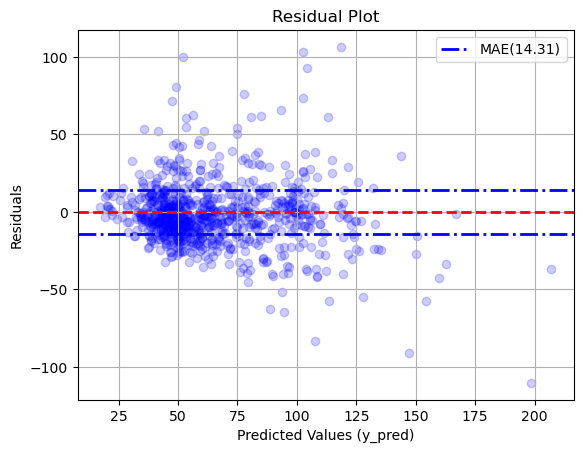

In [23]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, color='blue',alpha=0.2)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.axhline(y=-mae, color='blue', linestyle='-.', linewidth=2)
plt.axhline(y=mae, color='blue', linestyle='-.', linewidth=2,label = f"MAE({mae:.2f})")
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

# 4) Insights and Findings

## General Trends

**Industrial vs. Residential Areas:**

- Industrial areas consistently exhibit higher levels of pollutants due to concentrated industrial activities.
Residential areas also show significant pollution, particularly concerning particulate matter (PM10).

**Seasonal Variations:**
- Winter months (January-March) witness higher SO2 levels due to increased coal and fossil fuel burning for energy.
Summer months (April-June) showcase elevated PM10 levels owing to dry weather conditions and increased dust emissions.
- The trends show that PM10 concentrations were lowest in the winter months, likely due to increased rainfall settling particles in the air.

**Weekly and Daily Patterns:**

- Pollution levels tend to be higher on weekdays compared to weekends.
Higher variability is observed on Fridays and Tuesdays, with levels increasing from Monday to Wednesday and decreasing towards Thursday and Friday.

## Insights by Specific Area:

**Chennai:**
- Industrial zones display lower SO2 and NO2 levels compared to residential areas.
- Residential areas consistently show higher NO2 and RSPM/PM10 levels, with certain stations experiencing more significant pollution.

**Coimbatore, Cuddalore, Madurai, Mettur, Salem, Tuticorin, Trichy:**

- Each region displays a similar trend with industrial areas having higher pollution levels, notably in SO2 and PM10.
- Residential areas also exhibit considerable pollution, particularly in RSPM/PM10, but with relatively lower SO2 and NO2 levels compared to industrial sites.

### Chennai
- **Overall Air Quality**: 
  - Average SO2: ~13 µg/m³
  - Average NO2: ~22 µg/m³
  - Average RSPM/PM10: ~58 µg/m³.
- Key Findings:
  - Higher SO2 and NO2 levels in the residential "Kilpauk" area.
  - Industrial area "Govt. High School, Manali" exhibits lower SO2 and NO2 levels.
  - Variability in pollutant concentrations is lower in industrial areas.
  - Residential areas like "Adyar" have lower SO2, NO2, and RSPM/PM10 levels.
  - Concerns about air pollution in "Thiyagaraya Nagar" due to high RSPM/PM10 levels.

### Coimbatore
- **Overall Air Quality**:
  - Average SO2: ~4.54 µg/m³
  - Average NO2: ~25.35 µg/m³
  - Average RSPM/PM10: ~49.20 µg/m³.
- Key Findings:
  - Higher SO2 levels in the residential area around "Distt. Collector's Office."
  - "SIDCO Office" in an industrial area displays higher SO2 and NO2 levels.
  - Variability in pollutant concentrations is lower in industrial areas.
  - Residential area "Poniarajapuram" shows lower SO2 and NO2 levels.
  - Concerns about air pollution in the industrial area near "SIDCO Office" due to high RSPM/PM10 levels.

### Cuddalore
- **Overall Air Quality**:
  - Average SO2: ~8.97 µg/m³
  - Average NO2: ~19.71 µg/m³
  - Average RSPM/PM10: ~61.93 µg/m³.
- Key Findings:
  - Varied SO2 and NO2 levels in different areas.
  - "District Environmental Engineer Office" in a residential area shows lower SO2 and NO2 levels.
  - Concerns in "Eachangadu Village" due to high SO2 and NO2 levels.
  - "SIPCOT Industrial Complex" exhibits better air quality in SO2 and NO2.
  - High RSPM/PM10 levels in "Eachangadu Village" indicating air pollution concerns.

### Madurai
- **Overall Air Quality**:
  - Average SO2: ~13.32 µg/m³
  - Average NO2: ~25.77 µg/m³
  - Average RSPM/PM10: ~45.72 µg/m³.
- Key Findings:
  - Higher SO2 and NO2 levels in "Fenner (I) Ltd. Employees Association Building" in an industrial area.
  - Lower SO2 and NO2 levels in the residential area around "Highway (Project -I) Building."
  - Residential area "Kunnathur Chatram" shows higher RSPM/PM10 levels.
  - Concerns in "Kunnathur Chatram" due to elevated RSPM/PM10 levels.

### Mettur
- **Overall Air Quality**:
  - Average SO2: ~8.43 µg/m³
  - Average NO2: ~23.19 µg/m³
  - Average RSPM/PM10: ~52.72 µg/m³.
- Key Findings:
  - Lower SO2 and NO2 levels in the residential area "Raman Nagar."
  - "SIDCO Industrial Complex" in an industrial area shows higher SO2 and NO2 levels.
  - Residential area "Raman Nagar" exhibits better air quality.
  - Concerns in the industrial area due to higher NO2 levels.

### Salem
- **Overall Air Quality**:
  - SO2: ~8.11 µg/m³
  - NO2: ~28.66 µg/m³
  - RSPM/PM10: ~62.95 µg/m³.
- Key Findings:
  - "Sowdeswari College Building" in Residential, Rural, and Other Areas has pollutant levels similar to the city's overall averages.
  - High RSPM/PM10 levels observed consistently.

### Tuticorin
- **Overall Air Quality**:
  - SO2: ~12.98 µg/m³
  - NO2: ~18.50 µg/m³
  - RSPM/PM10: ~83.44 µg/m³.
- Key Findings:
  - Industrial areas exhibit higher RSPM/PM10 levels.
  - Residential areas have relatively lower SO2 and NO2 levels.
  - "AVM Jewellery Building" exhibits better air quality in SO2 and NO2.
  - Concerns in "Raja Agencies" due to high pollutant levels.

### Trichy
- **Overall Air Quality**:
  - SO2: ~15.29 µg/m³
  - NO2: ~18.70 µg/m³
  - RSPM/PM10: ~85.23 µg/m³.
- Key Findings:
  - Moderate to high pollutant concentrations in Residential, Rural, and Other Areas.
  - "Central Bus Stand" exhibits the highest RSPM/PM10 levels.
  - Concerns regarding RSPM/PM10 levels in various stations.

## Summary Insights:
- All regions exhibit higher pollution during winter (November to February), with industrial areas more heavily impacted due to increased energy demand and activities.
- Particulate matter (RSPM/PM10) consistently stands as a major concern in both industrial and residential areas across all regions.

<div align="right"><h3>Author: <a href="https://www.linkedin.com/in/satz1230/" target="_blank">Satz</a></div>